<a href="https://colab.research.google.com/github/DavideBuldrin1/feature-extraction-for-text/blob/main/lsa_lda_and_nmf_for_feature_extraction_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSA LDA and NMF for text mining

In the notebook we will focus on three methods for dimensionality reduction (feature extraction) and topic modelling.
- **Latent Semantic Analysis (LSA)**
- **Latent Dirichlet Allocation (LDA)**
- **Non-Negative Matrix Factorization (NMF)**

# Introduction to the methods
##  Latent Semantic Analysis (LSA)
LSA assumes that words that are close in meaning will occur in similar pieces of text (distributional hypothesis). A matrix containing word counts or (tf-idf values) per document  is constructed than singular value decomposition (SVD) is used to reduce the number of rows while preserving similarity structure among columns. document can be compared by cosine similarity.

**PRO**
- Dimension Reduction: LSA effectively reduces dimensionality of data while capturing semantic relationships, making it useful for information retrieval and document similarity.
- Visualization: first dimensions of the reduction contain a lot of information and useful 2D or 3D can but used to visualize similarities
- Mathematically Sound: LSA is based on well-established linear algebra techniques, which can be advantageous for certain applications.
- Fast

**Cons**
- Interpretability:results not easy interpretable (also due to the fact that we can have negative values)


**NOTE** SVD is the usual $ M = U \sum{}V$*  U and V complex unitary matrix on a orthonormal eigenbasis that represents a rotation, than $\sum{}$ is the diagonal matrix of eigenvector that represent the dilation,
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/1024px-Singular-Value-Decomposition.svg.png" width="500"/>
</div>

##  Latent Dirichlet Allocation (LDA)
Key characteristic: LDA is a generative probabilistic model that represents documents as mixtures of topics, making it useful for document clustering and topic modelling.
A topic is considered to be a set of terms that, taken together, suggest a shared theme. LDA tries to uncover these latent (hidden) topics by analyzing the distribution of words in the documents.
LDA assigns a probability distribution of topics to each document and a probability distribution of words to each topic. These probability distributions can be used as features

Most documents will contain only a relatively small number of topics. In the collection individual topics will occur with differing frequencies. That is, they have a probability distribution, so that a given document is more likely to contain some topics than others.
Within a topic, certain terms will be used much more frequently than others. In other words, terms within a topic will also have their own probability distribution.

The probability are computed using Bayesian methods and an Expectation Maximization algorithm.

**How does LDA work?**

We know the words that belong to a document we need to calculate probability of words belonging into a topic.

- Initially for each document each word in each document randomly assigned to one of k topics (k is chosen beforehand).
•	For each document d, go through each word w and compute :
  1.	**p(topic t | document d)**: the proportion of words in document d that are assigned to topic t. Tries to capture how many words belong to the topic t for a given document d. Excluding the current word.
If a lot of words from d belongs to t, it is more probable that word w belongs to t.
( #words in d with t +alpha/ #words in d with any topic+ k*alpha)
  2.	**p(word w| topic t)**: probability of observing a specific word (w) given a particular topic.
LDA represents documents as a mixture of topics. Similarly, a topic is a mixture of words. If a word has high probability of being in a topic, all the documents having w will be more strongly associated with t as well. Similarly, if w is not very probable to be in t it won’t be bringing many such documents to t.
  3.	Update the probability for word w belonging to topic t, as:
  **p(word w with topic t)** = **p(topic t | document d)** x **p(word w | topic t)**


**PRO**
- Topic Proportions: LDA provides topic proportions for each document, allowing you to understand the mixture of topics in a document.
- Multiclass classification: for the reason above it can be use for more complex classification tasks. (the topic may not correspond to a class the topic extraction is not supervised)
- Interpretability : Probability distribution and topics
- Polysemy: a single word can be important for more than one topic

**Cons**
- Parameter tuning
- Slower than other methods
- Visualization: not easily adaptable for visualization purpose

Is it possible maybe to create our topic assigning prob to word while in LSA is not straight forward to which word give negative or near zero values because it is not creating topic it is reducing dimension.


##  Non-Negative Matrix Factorization (NMF)
In Non Negative matrix Factorization a matrix **V** is factorized in the product of two matrix **W** **H** (i.e. **V = WH**) none of the matrix has negative elements this is not guaranteed to be possible and usually achieved by numerical approximation.
The dimensionality can be significantly reduced if **V** is an *m × n* matrix, **W** is an *m × p* matrix, and **H** is a *p × n* and **p** can be **small** the product **HW** should be similar to **V** minimizing Frobenius norm and enforcing the fact that the values have to be non negative.
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/NMF.png" width="500"/>
</div>

**PRO**
- Dimension Reduction
- Interpretability: positive values make easy to identify the extracted topic by looking at words with the bigger values inside the topic
- Usually fast

**Cons**
- Visualization: not easily adaptable for visualization purpose (each dimension represent a topic if a lot of them are useful is no easy to plot them in 2D or 3D graphs)

The output of this last model looks like the output of LDA we have topics and only positive values but is obtained without using probability distribution (at least not explicitly the distribution of words have an impact) and bayesian model.

# In This Notebook

- **LSA, LDA, NMF** will be performed in a subset of the *fetch_20newsgroups*
 <font color='blue'>12487 text documents</font> divided in <font color='blue'>13 classes </font> referring to <font color='blue'>5 bigger classes</font> (computer, motors, sports, science, politics),
- **Visualization** on low dimensional spaces
- **Supervised Classification** for an objective evaluation
- **Interpretability of features**
- **Time and Classification score** with different number of extracted feature.
- **Comparison with Language models**


## Utils and import packages

This section Contains functions to visualize and useful dictionaries containing classes ids.

In [ ]:
!pip install transformers_interpret
!pip install tensorflow tensorflow-hub
!pip install transformers evaluate datasets
!pip install lbl2vec
! pip install transformers torch
!pip install shap
!pip install lime
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers_interpret import SequenceClassificationExplainer

In [ ]:
from huggingface_hub import notebook_login

import evaluate
import random
import pickle
from datasets import Dataset, DatasetDict
from huggingface_hub import notebook_login
from transformers import DataCollatorWithPadding, AutoTokenizer
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, create_optimizer, TFAutoModelForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from transformers.keras_callbacks import KerasMetricCallback
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
import torch
import nltk
import time
# import umap
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np # linear algebra
import pandas as pd # data processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import shap

from scipy import stats
from tqdm import tqdm
from scipy.io import arff
from lbl2vec import Lbl2Vec
from nltk.corpus import stopwords
from transformers import BertTokenizer, BertModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD, PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score,  adjusted_rand_score, normalized_mutual_info_score, pairwise_distances
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
random_state = 42

# Get the list of stopwords
nltk.download('stopwords')
stop_words = list(stopwords.words('english')) + ['just', 'don', 'like', 'think', 've', 'good', 'time', 'say', 'really', 'll']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# set of list and dict containg useful informations for classes
categories = [
    "alt.atheism",
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    #"soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    #"talk.religion.misc",
]

rgb_colors = ['#669999', '#b3cccc', '#334d4d','#ff0000','#ff9999', '#3366ff','#00ccff','#00cc00','#70db70','#00ff00','#ffd24d','#e6e600','#ffcc66']
categories = [
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",

    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",

]
colors = ['#669999', '#334d4d', '#00ccff','#00ff00','#ffcc66']
dict_related_categories = {0:0,1:0,2:0, 3:1,4:1, 5:2,6:2, 7:3,8:3,9:3, 10:4,11:4,12:4} # similar topic aggegated

# label to id for categories and label to id of superclasses
dict_related_categories_name = {"comp.graphics":0, "comp.sys.ibm.pc.hardware":0, "comp.sys.mac.hardware":0,
                                "rec.autos":1,"rec.motorcycles":1,
                                "rec.sport.baseball":2,"rec.sport.hockey":2,
                                "sci.crypt":3,"sci.electronics":3,"sci.med":3,
                                "talk.politics.guns":4,"talk.politics.mideast":4,"talk.politics.misc":4}
id2label = {"comp.graphics":0, "comp.sys.ibm.pc.hardware":1, "comp.sys.mac.hardware":2,
                                "rec.autos":3,"rec.motorcycles":4,
                                "rec.sport.baseball":5,"rec.sport.hockey":6,
                                "sci.crypt":7,"sci.electronics":8,"sci.med":9,
                                "talk.politics.guns":10,"talk.politics.mideast":11,"talk.politics.misc":12}
label2id = {v: k for k, v in id2label.items()}

max_width = max(len(f'{label2id[i]} :') for i in range(13))

In [ ]:
def plot_lsa_2d(lsa_results, labels, component1=0, component2=1):
    """
    Plot LSA results in 2D using two components and color points based on labels.

    Args:
        lsa_results: The LSA results
        labels: Labels for each data point
        component1 (int): Index of the first component to plot (default: 0)
        component2 (int): Index of the second component to plot (default: 1)
    """
    rgb_colors = ['#669999', '#b3cccc', '#334d4d','#ff0000','#ff9999', '#3366ff','#00ccff','#00cc00','#70db70','#00ff00','#ffd24d','#e6e600','#ffcc66']

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=lsa_results[:, component1], y=lsa_results[:, component2], hue=labels, palette=rgb_colors, s=80, legend='full') #palette = 'viridis'

    x = min(lsa_results[:, component1])*2
    y = max(lsa_results[:, component2])*0.9

    # Add labels and a legend
    plt.xlabel(f'Component {component1 + 1}')
    plt.ylabel(f'Component {component2 + 1}')
    plt.title('Results in 2D')
    plt.legend(title='Labels')
    plt.text(x, y, ' gray = computer \n red= vehicles \n blue = sport\n green = science \n yellow = politics', fontsize=10, color='black')

    # Show the plot
    plt.show()

def visualize_features(nmf_results, class_labels,categories):
    """
    Visualize the distribution of NMF or LDA features for each class.

    Args:
        nmf_results : The NMF results
        class_labels: Labels for each data point.
    """
    unique_classes = np.sort(np.unique(class_labels))
    # Create a figure with subplots for each class
    fig, axes = plt.subplots(len(unique_classes), figsize=(10, 30))
    fig.subplots_adjust(hspace=0.5)

    for i, class_label in enumerate(unique_classes):
        # Filter data points for the current class
        class_indices = np.where(class_labels == class_label)[0]
        class_data = nmf_results[class_indices]

        feature_mean =[]
        for j in range(len(categories)):
                feature_mean.append(class_data[:, j].mean())
        # Create a histogram for each class
        axes[i].bar(np.arange(len(feature_mean)), feature_mean,)
        axes[i].set_title(f'{categories[i]}')
        axes[i].set_xlabel('feature')
        axes[i].set_ylabel('mean')

    plt.show()


def annotate_cm(cm):
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')


def evaluator(extracted_features, labels, dict_related_categories, categories,random_state = 42, related_categories = None):
    '''takes feature and hierachcak structure of label and performs a classifcation on
       using a random forest presenting the results
    '''
    x_train_split, x_test_split, label_train, labels_test = train_test_split(
    extracted_features, labels, test_size=0.3, random_state=random_state)
    rf = RandomForestClassifier(criterion  = 'gini').fit(x_train_split, label_train)
    predictions = rf.predict(x_test_split)
    cm = ((confusion_matrix(labels_test, predictions,normalize = 'true'))*100).round(0)
    cm = np.vectorize(lambda x: int(f'{x:.0f}'))(cm)
    cm_similar_topic = ((confusion_matrix([dict_related_categories[i] for i in labels_test], [dict_related_categories[i] for i in predictions],normalize = 'true'))*100).round()
    cm_similar_topic = np.vectorize(lambda x: int(f'{x:.0f}'))(cm_similar_topic)

    report1 = classification_report(labels_test, predictions, target_names=categories)
    report2 = classification_report([dict_related_categories[i] for i in labels_test], [dict_related_categories[i] for i in predictions], target_names=related_categories)

    # plot classification results and feature importance
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges,origin='upper', aspect='auto',)
    plt.title('all topics')
    plt.colorbar()
    plt.xticks(np.arange(len(cm)))
    plt.yticks(np.arange(len(cm)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    annotate_cm(cm)

    plt.subplot(3, 2, 3)
    plt.text(0.2, 0.2, report1, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')

    # Plot confusion matrix 2
    plt.subplot(3, 2, 2)
    plt.imshow(cm_similar_topic, interpolation='nearest', cmap=plt.cm.Oranges,origin='upper', aspect='auto', )
    plt.title('similar topics aggregated')
    plt.colorbar()
    plt.xticks(np.arange(len(cm_similar_topic)))
    plt.yticks(np.arange(len(cm_similar_topic)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    annotate_cm(cm_similar_topic)

    plt.subplot(3, 2, 4)
    plt.text(0.2, 0.2, report2, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')

    plt.subplot(3, 2, 5)
    plt.barh(range(len(extracted_features[0])), rf.feature_importances_)
    plt.yticks(np.arange(len(extracted_features[0])))
    plt.title('Feature importance')

    plt.tight_layout()
    plt.show()

def run_test(num_topics, tfidf_matrix, count_matrix,  labels):
    ''' creates classification scores for NMF LDA LSA '''

    start = time.time()
    lsa = TruncatedSVD(n_components=num_topics)
    lsa_result = lsa.fit_transform(tfidf_matrix)
    end = time.time()
    time_lsa = (end-start)

    x_train_split, x_test_split, label_train, label_test = train_test_split(
    lsa_result, labels, test_size=0.3, random_state=random_state)
    rf = RandomForestClassifier(criterion  = 'gini').fit(x_train_split, label_train)
    predictions = rf.predict(x_test_split)
    lsa_score = f1_score(label_test, predictions, average = 'macro')

    # Apply LDA
    start = time.time()
    lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', random_state=random_state) # max_iter and learning online are usefull to make the computation faster learning_offset=50.
    lda_result = lda.fit_transform(count_matrix)
    end = time.time()
    time_lda = (end-start)
    x_train_split, x_test_split, label_train, label_test = train_test_split(
    lda_result, labels, test_size=0.3, random_state=random_state)
    rf = RandomForestClassifier(criterion  = 'gini').fit(x_train_split, label_train)
    predictions = rf.predict(x_test_split)
    lda_score = f1_score(label_test, predictions, average = 'macro')

    # Apply NMF
    start = time.time()
    nmf = NMF(n_components=num_topics, random_state=random_state, l1_ratio=.5)
    nmf_result = nmf.fit_transform(tfidf_matrix)
    end = time.time()
    time_nmf = (end-start)
    x_train_split, x_test_split, label_train, label_test = train_test_split(
    nmf_result, labels, test_size=0.3, random_state=random_state)
    rf = RandomForestClassifier(criterion  = 'gini').fit(x_train_split, label_train)
    predictions = rf.predict(x_test_split)
    nmf_score = f1_score(label_test, predictions, average = 'macro')


    return lsa_score,lda_score,nmf_score, time_lsa, time_lda ,time_nmf


def centroids_classes(results, class_labels,categories):
    """
    compute the cetroid of each class

    Args:
        results : The results of NMR, LDA or LSA
        class_labels: Labels for each data point.
    """
    unique_classes = np.sort(np.unique(class_labels))
    centroids = []
    for i, class_label in enumerate(unique_classes):
        # Filter data points for the current class
        class_indices = np.where(class_labels == class_label)[0]
        class_data = results[class_indices]

        centroid =[]
        for j in range(len(results[0])):
                centroid.append(np.mean(class_data[:, j]))
        centroids.append(centroid)
    return centroids


# Import dataset and apply methods

The techniques can be applied directly to the tf-idf or count-matrix.

In [ ]:
# import data (only the classes we are interested in)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories = categories,)
documents = newsgroups.data
topics = newsgroups.target
print('number of documents ', len(documents))
print('mean number of words for documents',np.array([len(document.split()) for document in documents]).mean().round())

number of documents  12487
mean number of words for documents 177.0


In [ ]:
# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words) # stop_words stop_words='english'
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

print('tfidf matrix shape', tfidf_matrix.shape, '\n')

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
count_matrix = count_vectorizer.fit_transform(documents)

# saving the word for future processing
word_indexes = tfidf_vectorizer.vocabulary_
my_words = {v: k for k, v in word_indexes.items()}

# Apply LSA
num_topics = len(categories) # Adjust the number of topics as needed
start = time.time()
lsa = TruncatedSVD(n_components=num_topics)
lsa_result = lsa.fit_transform(tfidf_matrix)
end = time.time()
print("The time of LSA is :",
      (end-start) * 10**3, "ms")

# Apply LDA
start = time.time()
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', random_state=random_state) # max_iter and learning online are usefull to make the computation faster learning_offset=50.
lda_result = lda.fit_transform(count_matrix)
end = time.time()
print("The time of LDA is :",
      (end-start) * 10**3, "ms")

# Apply NMF
start = time.time()
nmf = NMF(n_components=num_topics, random_state=random_state, l1_ratio=.5)
nmf_result = nmf.fit_transform(tfidf_matrix)
end = time.time()
print("The time of NMF is :",
      (end-start) * 10**3, "ms")

tfidf matrix shape (12487, 36498) 

The time of LSA is : 1008.7294578552246 ms
The time of LDA is : 57748.125314712524 ms
The time of NMF is : 2578.472375869751 ms


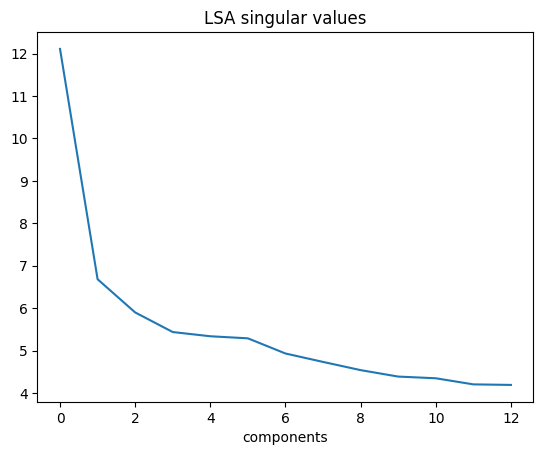

After 5 and 10 the slope of the profile changes, the values are going down


In [ ]:
# plot lsa eigenvalues
plt.plot(range(len(lsa.singular_values_)), lsa.singular_values_)
plt.title('LSA singular values')

plt.xlabel('components')

plt.show()
print('After 5 and 10 the slope of the profile changes, the values are going down')

# Visualization

Plotting the results in a 2D is more meaningful for the **LSA** reduction. In fact due to the **Singular Value Decomposition** the first few dimensions corresponding to  bigger singular values contain most of the information.
This is not given for the other two methods:

**LDA** there is no any enforced hierarchy for topics extracted and the number is suggested by the user (like in K-means clustering).

**NMF** the initial matrix m x n is approximated by the product of two matrix m x p and p x n without particular properties except the non negativity and the small size of p


Using just two componets we can easily see that the documets have been clusterd, plotting an other 2D graph can highlight the remaining classes.

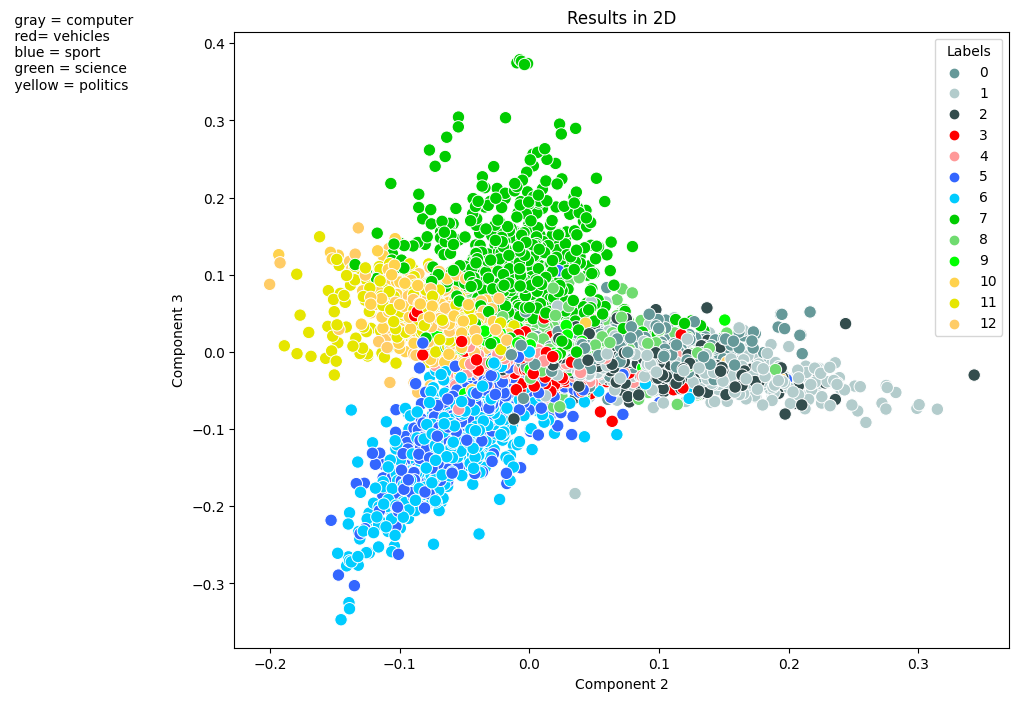

In [ ]:
# 2D graph of components of LSA
plot_lsa_2d(lsa_result, topics, component1=1, component2=2)

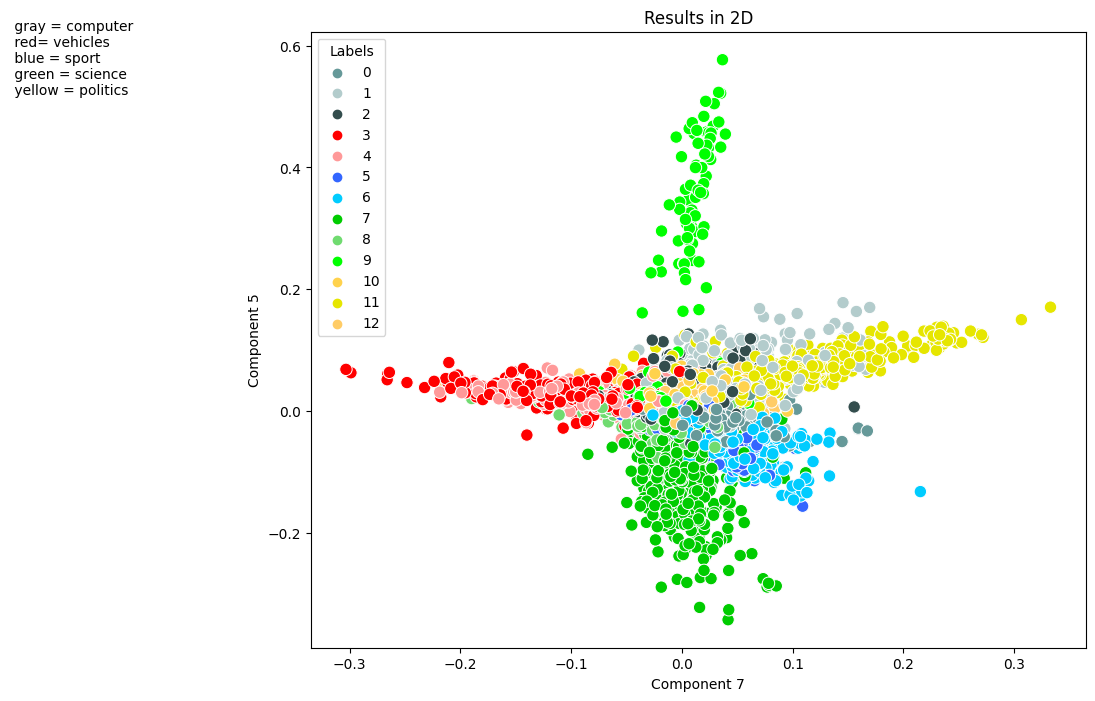

In [ ]:
plot_lsa_2d(lsa_result, topics, component1=6, component2=4)

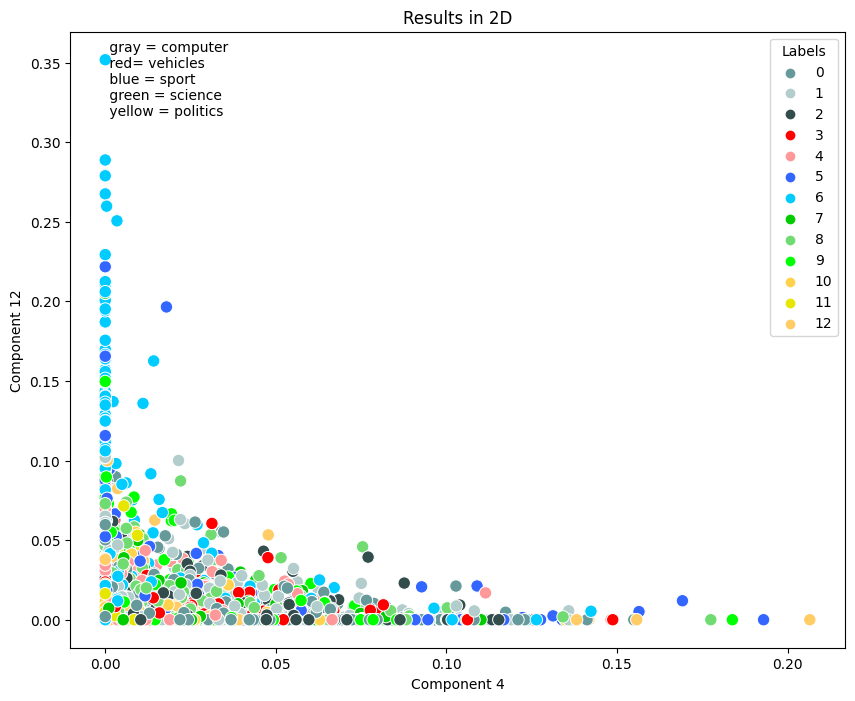

In [ ]:
plot_lsa_2d(nmf_result, topics, component1=3, component2=11)

For LDA and NMF each of the feature extracted can have a impact regardless of the order so an other type of visualization can give us an insight. for each of the classes we plot an histogram representing the presence of the feature in the class.

The heigth of the bar in the histogram is given by the mean of the values that each of the extracted topics get on the classes.

For example is one of the topic extracted is refered to *computer componets*  we can expect that to have an higher average values in the document refer to *hardware* and *electronics* more than *baseball*.

NMF features 
 In NMF We can see that the fearure 2 is important for sport realted classes, while the feature number 10 is importante for the identification of midest classes


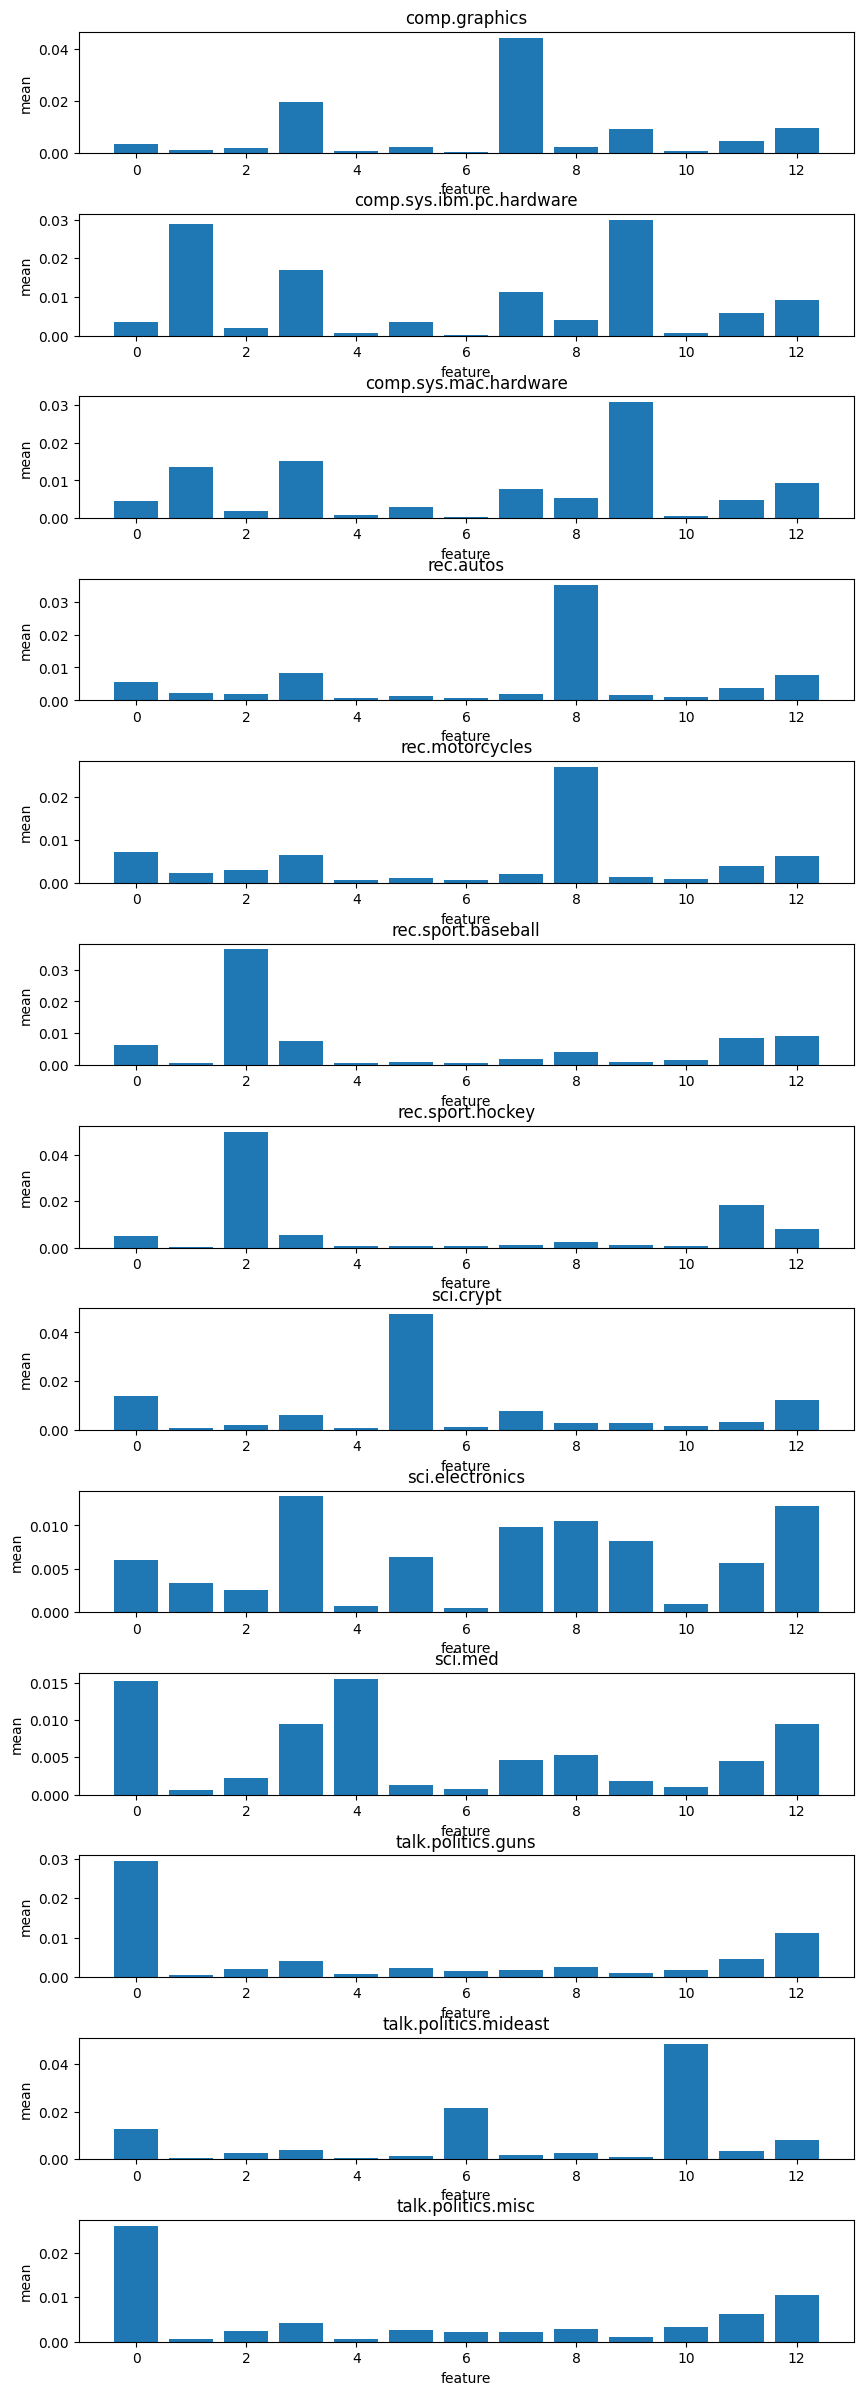

In [ ]:
# for each calss all the embedding made of 13 feature are averaged to obtain the average embedding
print('NMF features \n', 'In NMF We can see that the fearure 2 is important for sport realted classes, while the feature number 10 is importante for the identification of midest classes')
visualize_features(nmf_result, topics, categories = categories)


LDA features 
 In LDA We can see that the fearure 6 and 11 are important for computer realted classes


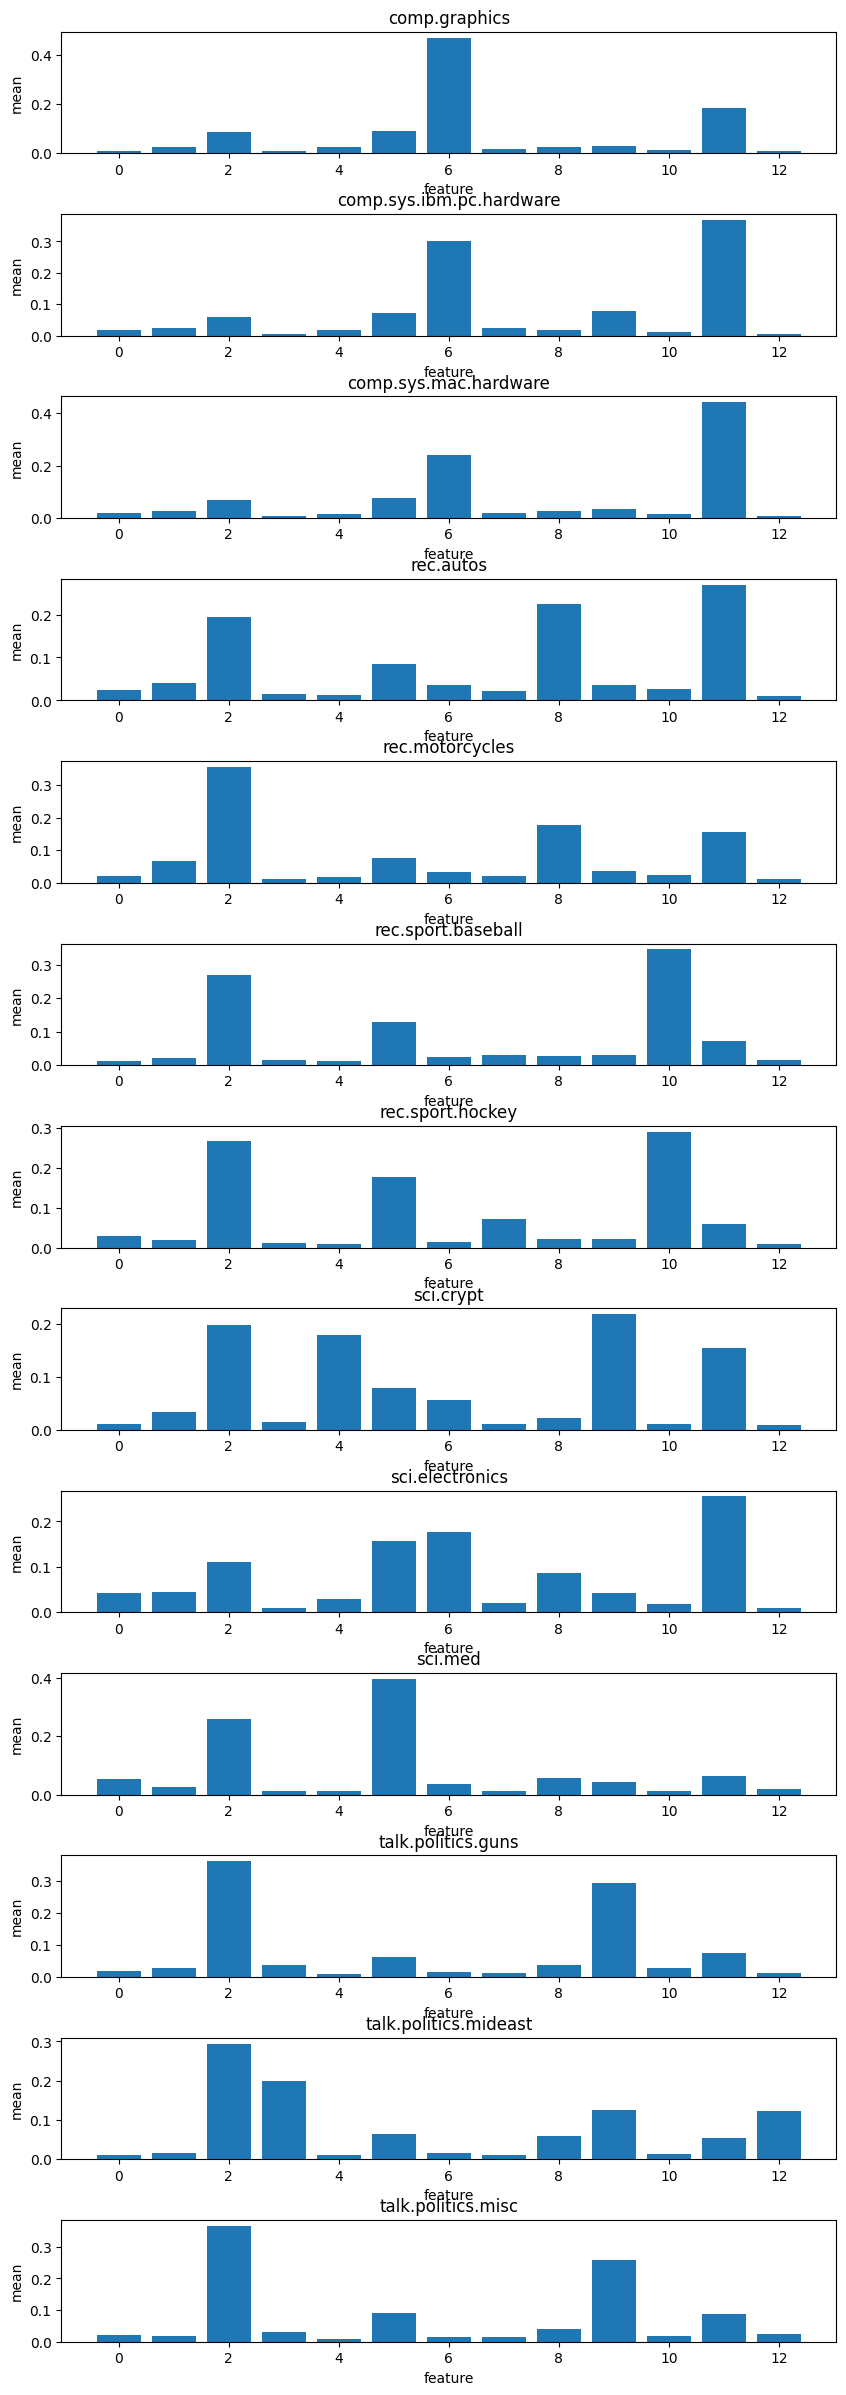

In [ ]:
# for each calss all the embedding made of 13 feature are averaged to obtain the average embedding
print('LDA features \n', 'In LDA We can see that the fearure 6 and 11 are important for computer realted classes')
visualize_features(lda_result, topics, categories = categories)

# Explainability (Components inspection)
So far **LSA** has had the best performance under all aspects, but the fact that encodes most the information in few signed dimensions, while the various topic extract by **LDA** and the non negativity of **NMF** factorization can make the encoding more interpretable.
Once the topic of the features are understood is can be possible possible to understand if a long document contains more than one topic.

## NMF LDA and LSA most important words
We have displayed the histogram of average embedding of each class, and some of the extracted feature have high value only in one or few class so an inspection can help to explain that behaviour.

In [ ]:
# for each of the peature extracted we look at the word that have the bigger value for that specifica topic
#document_topics = nmf_result.argmax(axis=1)
top_terms_per_topic = []
n_top_terms =10
for topic_idx in range(0,len(categories)):
    top_term_indices = nmf.components_[topic_idx].argsort()[::-1][:n_top_terms] #indices tha would sort the array so you have the word with the max importance
    top_terms = [my_words[i] for i in top_term_indices]
    top_terms_per_topic.append(top_terms)

In [ ]:
print('The component are 13 as we set, and for each word there is a value')
print('Shape of nmf componets',nmf.components_.shape)

The component are 13 as we set, and for each word there is a value
Shape of nmf componets (13, 36498)


In [ ]:
print('We have noticed that in NMF the topic 2 in importance for sports, while the 10 for mideast \n')
for i in range(13):
  print(f'topic  {i} :',top_terms_per_topic[i])
  #print('topic {} :',top_terms_per_topic[10])

We have noticed that in NMF the topic 2 in importance for sports, while the 10 for mideast 

topic  0 : ['people', 'one', 'gun', 'right', 'government', 'us', 'get', 'well', 'know', 'even']
topic  1 : ['drive', 'scsi', 'ide', 'drives', 'controller', 'disk', 'hard', 'floppy', 'hd', 'bus']
topic  2 : ['game', 'team', 'games', 'year', 'hockey', 'baseball', 'last', 'season', 'players', 'espn']
topic  3 : ['thanks', 'please', 'anyone', 'know', 'mail', 'advance', 'address', 'info', 'email', 'someone']
topic  4 : ['geb', 'dsl', 'n3jxp', 'cadre', 'chastity', 'skepticism', 'intellect', 'pitt', 'shameful', 'gordon']
topic  5 : ['key', 'chip', 'encryption', 'clipper', 'keys', 'escrow', 'government', 'algorithm', 'phone', 'system']
topic  6 : ['armenian', 'armenians', 'turkish', 'genocide', 'armenia', 'turkey', 'muslim', 'turks', 'soviet', 'russian']
topic  7 : ['graphics', 'image', 'program', 'file', 'files', 'format', 'software', 'ftp', 'gif', 'available']
topic  8 : ['car', 'bike', 'cars', 'engi

In [ ]:
# for each of the peature extracted we look at the word that have the bigger value for that specifica topic
top_terms_per_topic = []
for topic_idx in range(len(categories)):
    top_term_indices = lda.components_[topic_idx].argsort()[::-1][:n_top_terms]
    top_terms = [my_words[i] for i in top_term_indices]
    top_terms_per_topic.append(top_terms)

In [ ]:
print('We have notice that in LDA the topic 6 and 11 in importance for computer classes \n')
for i in range(13):
  print(f'topic  {i} :',top_terms_per_topic[i])

We have notice that in LDA the topic 6 and 11 in importance for computer classes 

topic  0 : ['health', 'db', 'cable', 'medical', 'canada', 'drugs', 'drug', 'insurance', 'dr', 'canadian']
topic  1 : ['edu', 'com', 'cs', 'ca', 'list', 'university', 'dod', 'org', 'send', 'david']
topic  2 : ['would', 'one', 'people', 'know', 'get', 'well', 'even', 'said', 'going', 'see']
topic  3 : ['armenian', 'armenians', 'jews', 'turkish', 'people', 'turkey', 'killed', '000', 'russian', 'history']
topic  4 : ['key', 'encryption', 'chip', 'clipper', 'keys', 'algorithm', 'message', 'privacy', 'security', 'public']
topic  5 : ['one', 'may', 'also', 'would', 'get', 'number', 'use', 'new', 'two', 'many']
topic  6 : ['image', 'file', 'jpeg', 'software', 'graphics', 'use', 'data', 'program', 'pc', 'available']
topic  7 : ['10', '25', '12', '11', '15', '16', '17', '00', '20', '14']
topic  8 : ['car', 'bike', 'cars', 'used', 'water', 'engine', 'oil', 'front', 'miles', 'one']
topic  9 : ['government', 'people'

In [ ]:
# SAME FOR LSA
# for each of the feature extracted we look at the word that have the bigger value for that specifica topic
top_terms_per_topic = []
for topic_idx in range(len(categories)):
    top_term_indices = lsa.components_[topic_idx].argsort()[::-1][:n_top_terms]
    top_terms = [my_words[i] for i in top_term_indices]
    top_terms_per_topic.append(top_terms)

In [ ]:
print('Bigger values per feature LSA \n')
for i in range(13):
  print(f'topic  {i} :',top_terms_per_topic[i])

Bigger values per feature LSA 

topic  0 : ['would', 'one', 'know', 'get', 'people', 'could', 'anyone', 'also', 'use', 'well']
topic  1 : ['thanks', 'drive', 'scsi', 'card', 'anyone', 'please', 'mac', 'mail', 'ide', 'advance']
topic  2 : ['key', 'government', 'encryption', 'chip', 'clipper', 'people', 'keys', 'law', 'escrow', 'use']
topic  3 : ['drive', 'scsi', 'ide', 'controller', 'drives', 'disk', 'hard', 'bus', 'system', 'floppy']
topic  4 : ['drive', 'geb', 'dsl', 'n3jxp', 'chastity', 'cadre', 'intellect', 'skepticism', 'shameful', 'surrender']
topic  5 : ['key', 'geb', 'pitt', 'dsl', 'cadre', 'n3jxp', 'chastity', 'skepticism', 'intellect', 'shameful']
topic  6 : ['israel', 'armenian', 'scsi', 'game', 'armenians', 'jews', 'turkish', 'israeli', 'government', 'team']
topic  7 : ['drive', 'scsi', 'would', 'thanks', 'please', 'anyone', 'ide', 'know', 'drives', 'game']
topic  8 : ['car', 'armenian', 'drive', 'armenians', 'turkish', 'new', 'please', 'key', 'mail', 'thanks']
topic  9 : ['

In [ ]:
# for each of the feature extracted we look at the word that have the bigger value for that specifica topic
top_terms_per_topic = []
for topic_idx in range(len(categories)):
    top_term_indices = lsa.components_[topic_idx].argsort()[:n_top_terms]
    top_terms = [my_words[i] for i in top_term_indices]
    top_terms_per_topic.append(top_terms)
print('smaller values per feature LSA')
for i in range(13):
  print(f'topic  {i} :',top_terms_per_topic[i])

smaller values per feature LSA
topic  0 : ['puggy_greybeards', 'andrew_kirk', 'skriko_wolves', 'mike_burger', 'milton_keynes_kings', 'gilles_carmel', 'mopar_muscle_men', 'pasi_fr', '_his_dogs', 'schott_shooters']
topic  1 : ['people', 'game', 'government', 'team', 'year', 'israel', 'games', 'said', 'right', 'us']
topic  2 : ['game', 'team', 'games', 'year', 'hockey', 'season', 'last', 'baseball', 'players', 'play']
topic  3 : ['thanks', 'please', 'anyone', 'mail', 'edu', 'know', 'advance', 'geb', 'cadre', 'dsl']
topic  4 : ['key', 'game', 'chip', 'encryption', 'clipper', 'keys', 'team', 'games', 'escrow', 'algorithm']
topic  5 : ['thanks', 'please', 'israel', 'people', 'anyone', 'know', 'armenian', 'jews', 'armenians', 'car']
topic  6 : ['car', 'bike', 'get', 'cars', 'engine', 'one', 'ride', 'buy', 'miles', 'dealer']
topic  7 : ['card', 'monitor', 'video', 'graphics', 'image', 'armenian', 'color', 'bit', 'apple', 'armenians']
topic  8 : ['would', 'card', 'monitor', 'video', 'israel', '

## Embedding exploration using Cosine similarity

For each class the average of its emdedding is computed and then compared with other classes average embedding, we expect similar embeddings for realtyed classes.

Then average class embeddings are compared with single word embedding to se the most important words

### LSA

In [ ]:
# compute the average embedding for each class
lsa_centroids = centroids_classes(lsa_result, topics, categories = categories)

# finds the words whose embedding is the most similar to the centroids
top_terms_per_topic = []
n_top_terms =10

for class_idx in range(0,len(categories)):
  centroid = np.array(lsa_centroids[class_idx][1:])
  similarity_array = []

  for term in lsa.components_.T:
    similarity_array.append(cosine_similarity(centroid.reshape(1,-1), term[1:].reshape(1,-1))*np.linalg.norm(term[1:].reshape(1,-1), ord=2)**(1/3)) # weighted by the norm

  similarity_array = np.array(similarity_array).reshape([len(similarity_array)])
  top_term_indices = similarity_array.argsort()[::-1][:n_top_terms] #indices tha would sort the array so you have the word with the max importance
  top_terms = [my_words[i] for i in top_term_indices]
  top_terms_per_topic.append(top_terms)

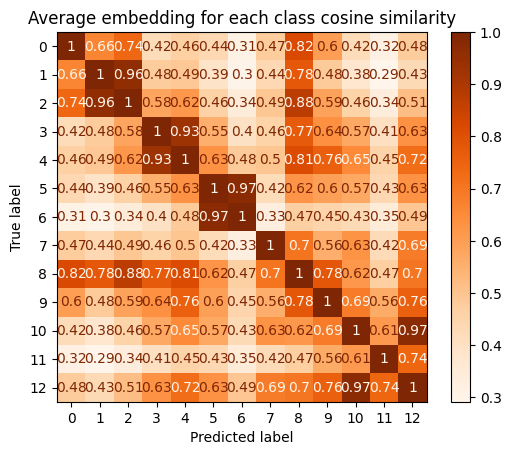

In [ ]:
#cosine similarity table for each average embedding
cs = cosine_similarity(np.array(lsa_centroids),np.array(lsa_centroids))
disp = ConfusionMatrixDisplay(confusion_matrix=cs)
disp.plot( cmap=plt.cm.Oranges)
plt.title('Average embedding for each class cosine similarity')
plt.show()

In [ ]:
print('Most important word for classes based on cosine similarity')
for i in range(13):
    label = f'{label2id[i]} :'
    terms = top_terms_per_topic[i]
    print(f'{label.ljust(max_width)} {terms}') #**1/2

Most important word for classes based on cosine similarity
comp.graphics :            ['graphics', 'image', 'program', 'file', 'files', 'ftp', 'software', 'gif', 'format', 'images']
comp.sys.ibm.pc.hardware : ['scsi', 'controller', 'mac', 'drive', 'ide', 'card', 'bus', 'pc', 'drives', 'disk']
comp.sys.mac.hardware :    ['card', 'mac', 'monitor', 'board', 'apple', 'video', 'pc', 'ram', 'memory', 'port']
rec.autos :                ['car', 'cars', 'engine', 'bike', 'miles', 'dealer', 'oil', 'ford', 'new', 'insurance']
rec.motorcycles :          ['bike', 'car', 'ride', 'engine', 'cars', 'riding', 'front', 'bikes', 'back', 'rear']
rec.sport.baseball :       ['game', 'team', 'games', 'year', 'season', 'hockey', 'players', 'last', 'win', 'baseball']
rec.sport.hockey :         ['game', 'games', 'team', 'hockey', 'season', 'play', 'baseball', 'win', 'year', 'last']
sci.crypt :                ['key', 'encryption', 'clipper', 'chip', 'keys', 'escrow', 'algorithm', 'nsa', 'secure', 'security']
sci

### NMF

In [ ]:
# compute the average embedding for each class
centroids = centroids_classes(nmf_result, topics, categories = categories)
top_terms_per_topic = []
n_top_terms =10

for class_idx in range(0,len(categories)):
  centroid = np.array(centroids[class_idx])
  similarity_array = []
#extract most similar words
  for term in nmf.components_.T:
    similarity_array.append(cosine_similarity(centroid.reshape(1,-1), term.reshape(1,-1))*np.linalg.norm(term.reshape(1,-1), ord=2)**(1/3)) # *np.linalg.norm(term.reshape(1,-1)) **0.5 works

  similarity_array = np.array(similarity_array).reshape([len(similarity_array)])
  top_term_indices = similarity_array.argsort()[::-1][:n_top_terms] #indices tha would sort the array so you have the word with the max importance
  top_terms = [my_words[i] for i in top_term_indices]
  top_terms_per_topic.append(top_terms)

saved_terms = top_terms_per_topic

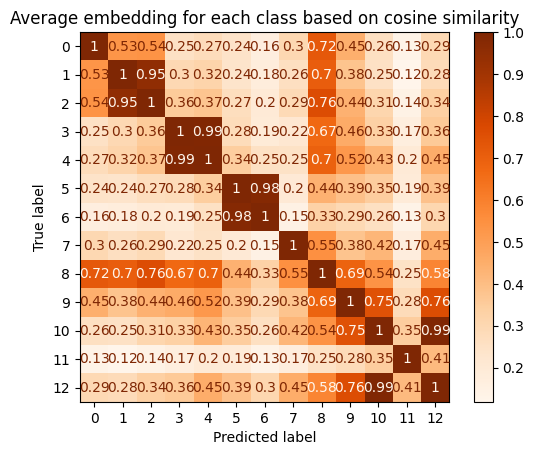

In [ ]:
#cosine similarity table for each average embedding
cs = cosine_similarity(np.array(centroids),np.array(centroids))
disp = ConfusionMatrixDisplay(confusion_matrix=cs)
disp.plot( cmap=plt.cm.Oranges)
plt.title('Average embedding for each class based on cosine similarity')
plt.show()

In [ ]:
print('Most important word for classes based on cosine similarity')
for i in range(13):
    label = f'{label2id[i]} :'
    terms = top_terms_per_topic[i]
    print(f'{label.ljust(max_width)} {terms}') #**1/2

Most important word for classes based on cosine similarity
comp.graphics :            ['graphics', 'image', 'program', 'file', 'files', 'ftp', 'software', 'format', 'available', 'gif']
comp.sys.ibm.pc.hardware : ['drive', 'scsi', 'mac', 'card', 'bus', 'need', 'system', 'controller', 'problem', 'monitor']
comp.sys.mac.hardware :    ['card', 'monitor', 'mac', 'video', 'bus', 'need', 'apple', 'work', 'problem', 'board']
rec.autos :                ['car', 'bike', 'cars', 'engine', 'new', 'miles', 'get', 'back', 'oil', 'ride']
rec.motorcycles :          ['car', 'bike', 'new', 'cars', 'get', 'engine', 'back', 'one', 'much', 'miles']
rec.sport.baseball :       ['game', 'team', 'games', 'year', 'hockey', 'last', 'baseball', 'season', 'players', 'play']
rec.sport.hockey :         ['game', 'team', 'games', 'year', 'hockey', 'season', 'play', 'baseball', 'last', 'players']
sci.crypt :                ['key', 'chip', 'encryption', 'clipper', 'keys', 'escrow', 'algorithm', 'phone', 'public', 'nsa']


### LDA

In [ ]:
# compute the average embedding for each class
centroids = centroids_classes(lda_result, topics, categories = categories)
top_terms_per_topic = []
n_top_terms =10


#extract most similar words to the centroids
for class_idx in range(0,len(categories)):
  centroid = np.array(centroids[class_idx])
  similarity_array = []

  for term in lda.components_.T:
    similarity_array.append(cosine_similarity(centroid.reshape(1,-1), term.reshape(1,-1))*np.linalg.norm(term.reshape(1,-1), ord=2)**(1/3))

  similarity_array = np.array(similarity_array).reshape([len(similarity_array)])
  top_term_indices = similarity_array.argsort()[::-1][:n_top_terms] #indices tha would sort the array so you have the word with the max importance
  top_terms = [my_words[i] for i in top_term_indices]
  top_terms_per_topic.append(top_terms)

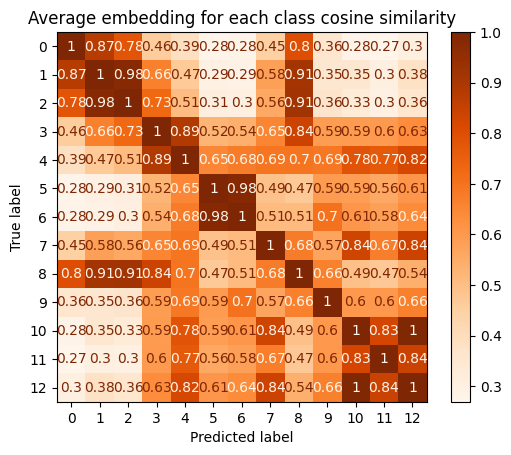

In [ ]:
#cosine similarity table for each average embedding
cs = cosine_similarity(np.array(centroids),np.array(centroids))
disp = ConfusionMatrixDisplay(confusion_matrix=cs)
disp.plot( cmap=plt.cm.Oranges)
plt.title('Average embedding for each class cosine similarity')
plt.show()

In [ ]:
print('Most important word for classes based on cosine similarity')
for i in range(13): # remove first feature
    label = f'{label2id[i]} :'
    terms = top_terms_per_topic[i]
    print(f'{label.ljust(max_width)} {terms}') # **2

Most important word for classes based on cosine similarity
comp.graphics :            ['image', 'file', 'software', 'jpeg', 'use', 'graphics', 'bit', 'also', 'program', 'available']
comp.sys.ibm.pc.hardware : ['use', 'would', 'system', 'also', 'need', 'anyone', 'thanks', 'get', 'work', 'please']
comp.sys.mac.hardware :    ['would', 'anyone', 'need', 'drive', 'work', 'get', 'know', 'thanks', 'also', 'problem']
rec.autos :                ['would', 'one', 'know', 'get', 'much', 'could', 'make', 'also', 'want', 'work']
rec.motorcycles :          ['one', 'would', 'know', 'get', 'people', 'well', 'even', 'could', 'way', 'see']
rec.sport.baseball :       ['one', 'would', 'year', 'first', 'last', 'game', 'well', 'get', 'people', 'two']
rec.sport.hockey :         ['one', 'would', 'first', 'year', 'last', 'well', 'get', 'people', 'two', 'know']
sci.crypt :                ['would', 'one', 'people', 'get', 'know', 'could', 'right', 'two', 'well', 'use']
sci.electronics :          ['would', 'one', 

# Classification
The aim of feature extraction is to reduce the size of the data but without loosing most of the information. So a model if fitted with the new features in order to see if their are enough to fit a classification model.

## Results

The classification done using **LSA** and **NMf** feature has the best perfromances.
The feauture importance is bigger for the first features in **LSA** while it is distrubuted more randomly for the other methods.

**Common errors**  miscalssification between news related to the computer graphics and electronics are common, the other most common misclassification are between elements of the same 5 aggregated-classes.

### LSA

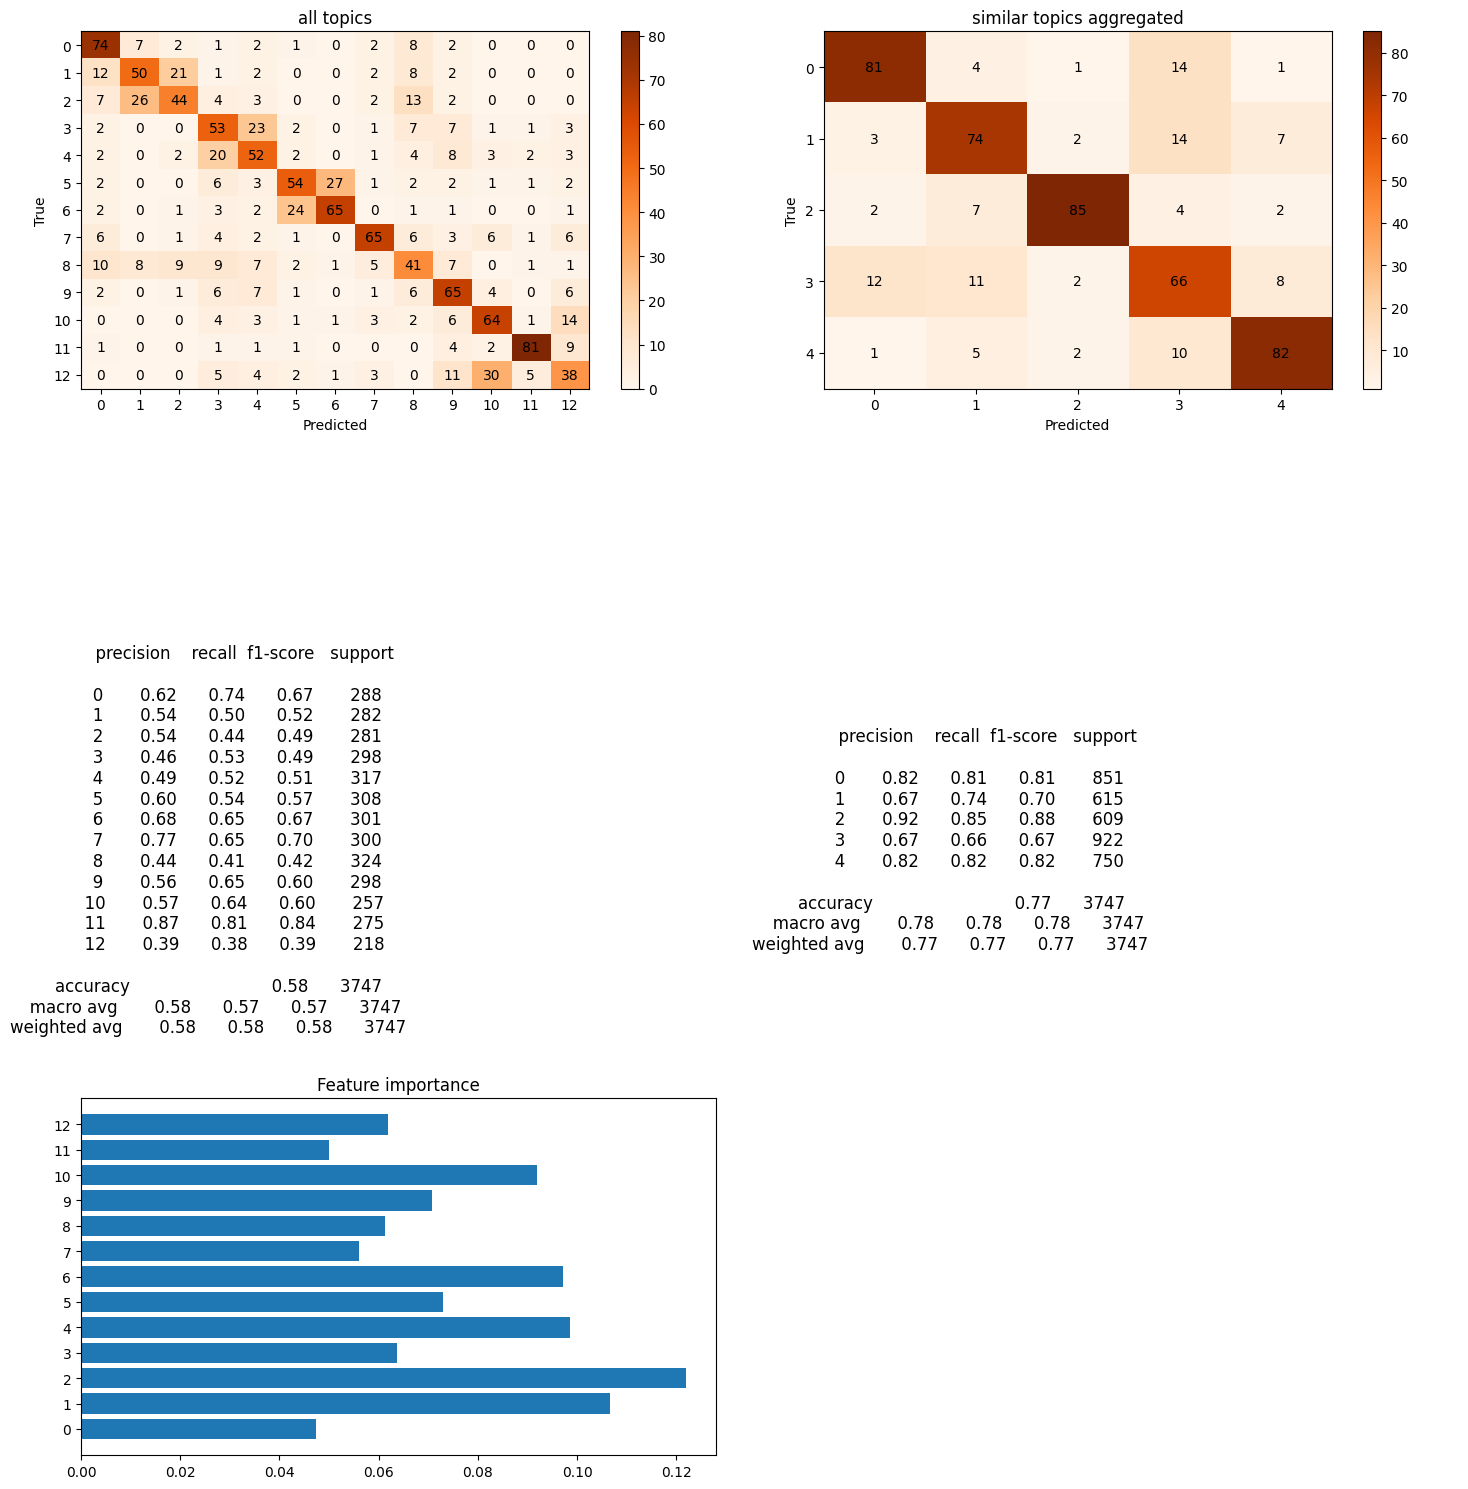

In [ ]:
# the evaluator runs the classifcation with rundom forest and plot the results
evaluator(lsa_result, topics, dict_related_categories = dict_related_categories, categories = None)

### NMF

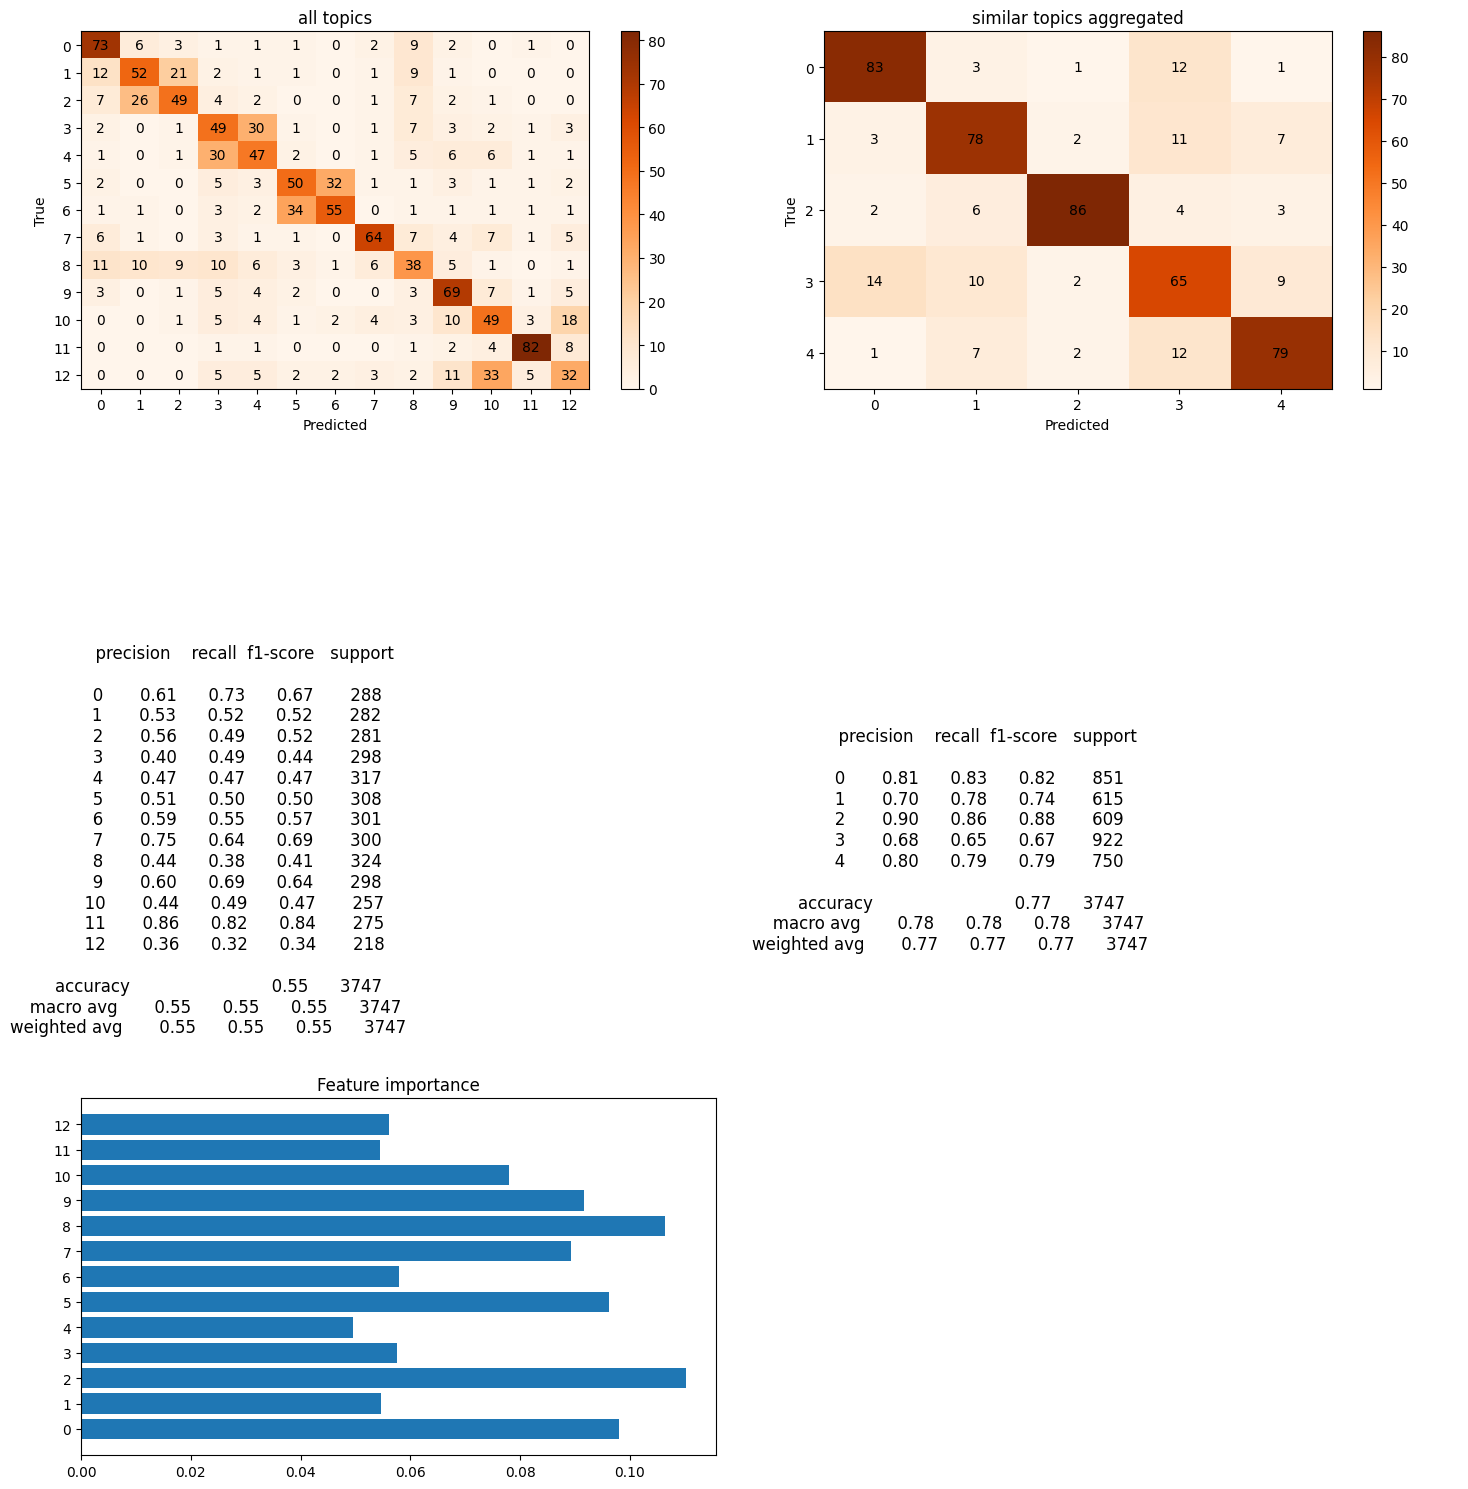

In [ ]:
# the evaluator runs the classifcation with rundom forest and plot the results
evaluator(nmf_result, topics, dict_related_categories = dict_related_categories, categories = None)

### LDA

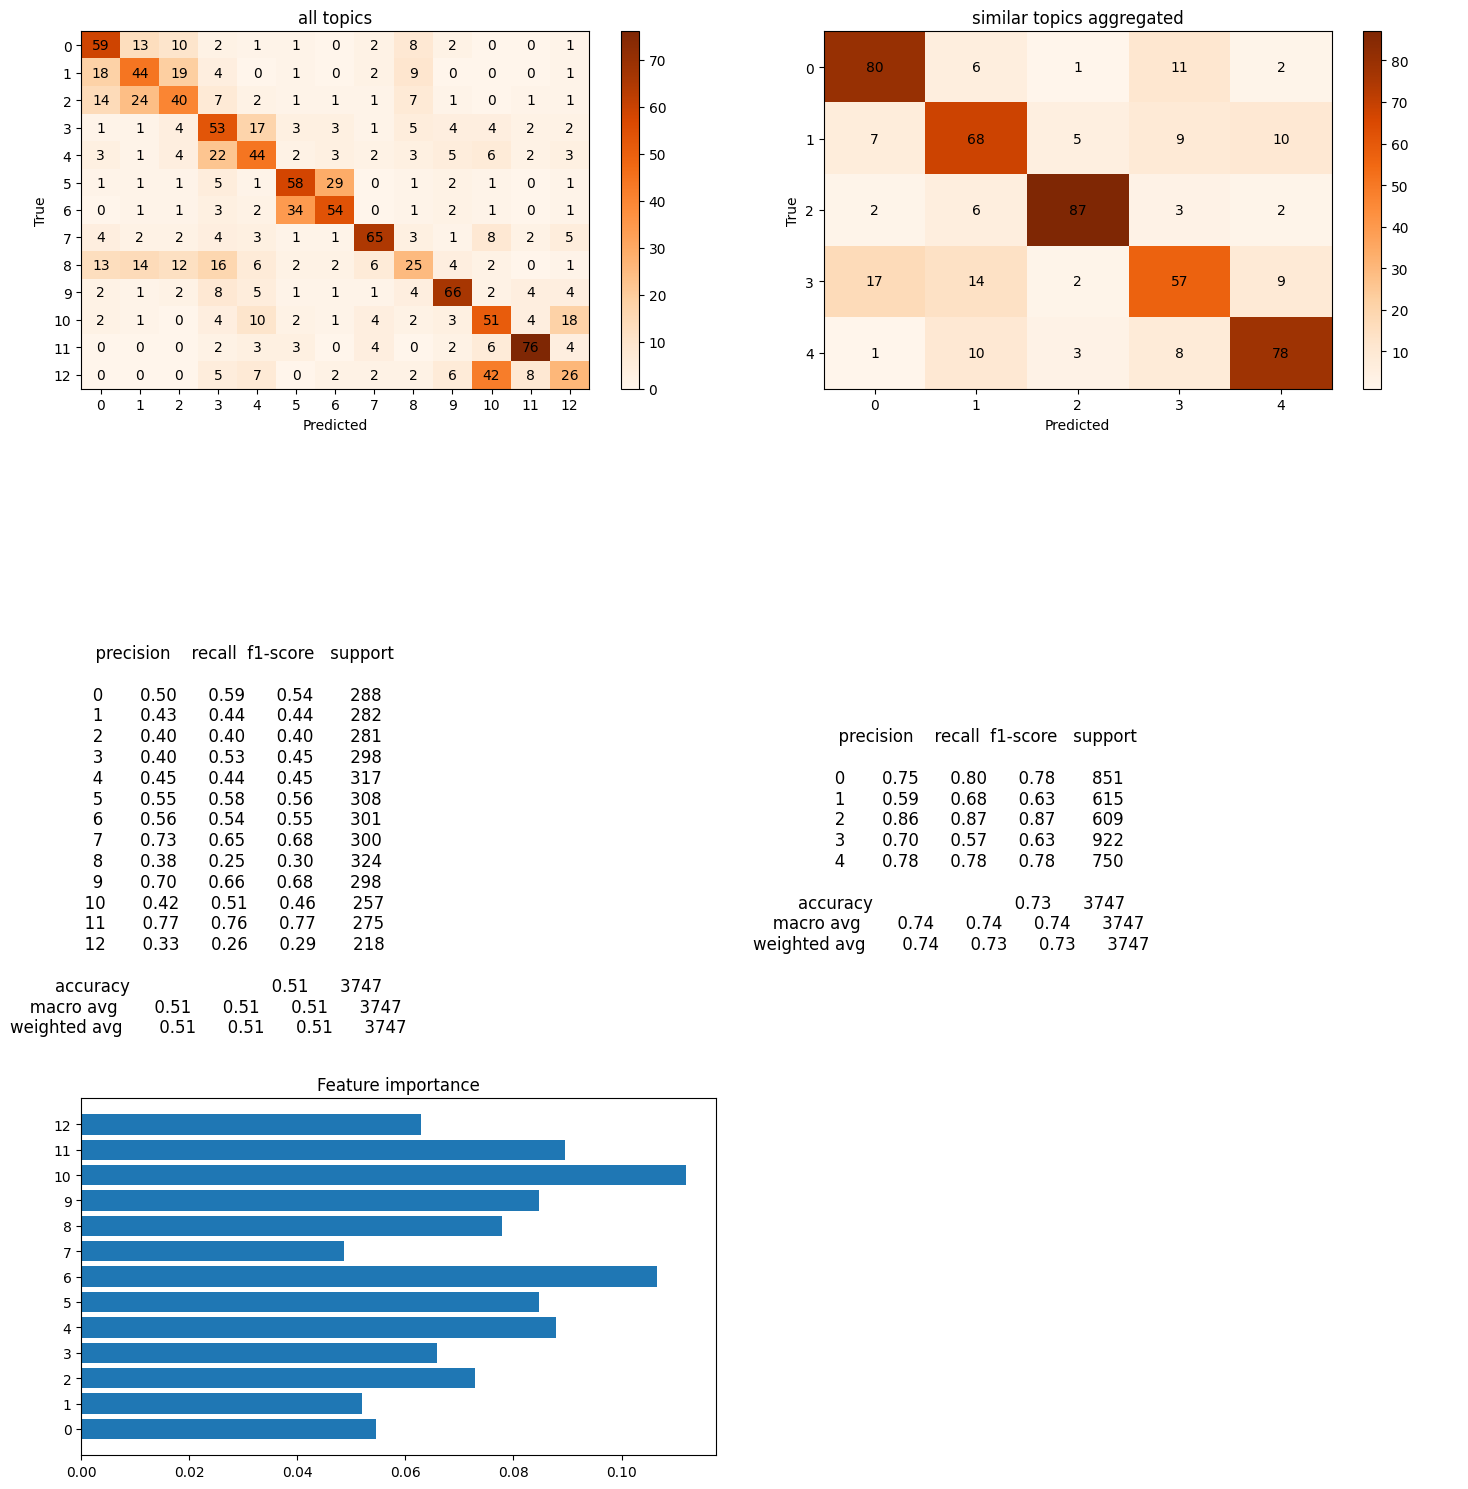

In [ ]:
# the evaluator runs the classifcation with rundom forest and plot the results
evaluator(lda_result, topics, dict_related_categories = dict_related_categories, categories = None)

# Performance with different number of features/topic extracted

In [ ]:
# Run methods with the number of features extracted in the list
lsa_score,lda_score,nmf_score = [],[],[]
time_lsa, time_lda ,time_nmf = [],[],[]
topic_list = [1,2,3,5,7,10,13, 15,20,25, 30, 40, 50, 80, 100 ]
for n_topic in topic_list:
    print('evaluating for topics = ', n_topic)
    tmp1,tmp2,tmp3, time1,time2,time3 = run_test(n_topic, tfidf_matrix, count_matrix,  topics)
    lsa_score.append(tmp1)
    lda_score.append(tmp2)
    nmf_score.append(tmp3)
    time_lsa.append(time1)
    time_lda.append(time2)
    time_nmf.append(time3)

evaluating for topics =  1
evaluating for topics =  2
evaluating for topics =  3
evaluating for topics =  5
evaluating for topics =  7
evaluating for topics =  10
evaluating for topics =  13
evaluating for topics =  15
evaluating for topics =  20
evaluating for topics =  25
evaluating for topics =  30


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


evaluating for topics =  40
evaluating for topics =  50
evaluating for topics =  80


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


evaluating for topics =  100


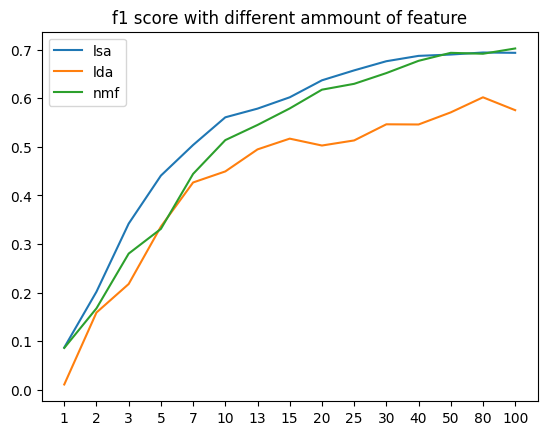

In [ ]:
plt.plot([str(topic) for topic in topic_list], lsa_score, label = 'lsa')
plt.plot([str(topic) for topic in topic_list], lda_score, label = 'lda')
plt.plot([str(topic) for topic in topic_list], nmf_score, label = 'nmf')
plt.legend()
plt.title('f1 score with different ammount of feature')
plt.show()

## Comments
**F1 score**

As expected for the few feature the **LSA** f1 score encreases fast (as known they contain most of the information), the it plateau. for few ammount of feature **NMF** and **LDA** have similar performances, than **NMF** seem to perform as good as **LSA** for big numbers of features. The documets analysed have 177 word on average so taking 50 feature can be not be the best way to reduce the dimension, but still is way smaller the the tfidf matrix or the count matrix (they have size n_docs x num_word instead of n_docs x num_features). We will also see that LLM based feature extractores will need more features to do the trick.

**Time for computation**

The time for the **LSA** is smaller that the time needed for the other methods and encreases slowly. **LDA** in general the slower method (for this reason i have limted the number of iteration), **NMF** can be slow if the method does not (or struggles to) converge and the number of iteration required increases. (**NOTE** the NMF factorization is not always given and is obatained by optimization for this reason it may not converge).



In [ ]:
print(lda_result.shape)
print(lsa_result.shape)
print(tfidf_matrix.shape)
print(count_matrix.shape)

(12487, 13)
(12487, 13)
(12487, 36498)
(12487, 36498)


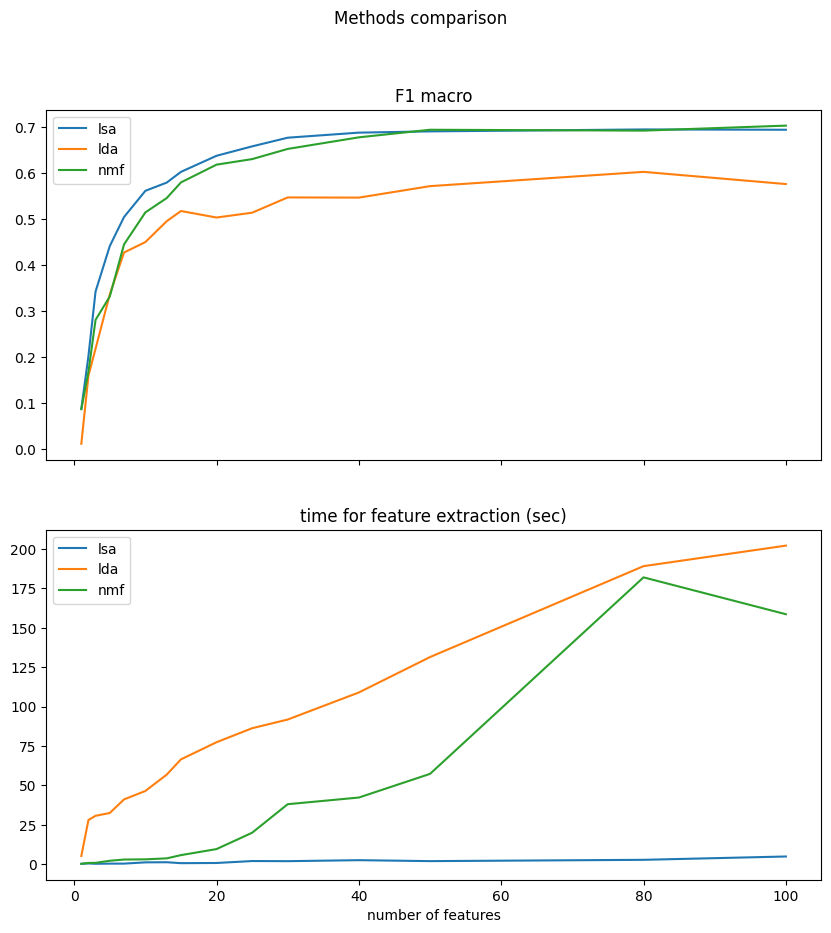

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))

# Plot data on the first subplot
ax1.plot([topic for topic in topic_list], lsa_score, label = 'lsa')
ax1.plot([topic for topic in topic_list], lda_score, label = 'lda')
ax1.plot([topic for topic in topic_list], nmf_score, label = 'nmf')
ax1.set_title('F1 macro')
ax1.legend()

# Plot data on the second subplot
ax2.plot([topic for topic in topic_list], time_lsa, label = 'lsa')
ax2.plot([topic for topic in topic_list], time_lda, label = 'lda')
ax2.plot([topic for topic in topic_list], time_nmf, label = 'nmf')
ax2.set_title('time for feature extraction (sec)')
ax2.legend()

# Add labels and titles
plt.xlabel('number of features')
plt.suptitle('Methods comparison')

# Show the plot
plt.show()

# Using pretrained language model
Documents representation  can be created or extracted from Language model and can be used for classification or other downstream tasks. In this section two ideas are tested:


*   Using **distil-BERT** last Hidden state as representation of document.
*   **Universal Sentence Encoder  (USE)** from Google.



## distil-BERT

For the classification is used the output of the last hidden layer, it contains the [CLS] followed by the token embedding.
The [CLS] should contain a rich representation of the entire input sentence, but without the fine-tuning is not given that the representation will be meaningful for our task.

The [CLS] and token embedding, are feed to the classifier, to reduce size mean and argmax are used. Unfortunately without any fine-tuning this is not significantly better than a Dummy classifier that always select the most common label.

<div>
<img src="https://editor.analyticsvidhya.com/uploads/17621aa.png" width="500"/>
</div>

In [ ]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories = categories,)
documents = newsgroups.data
topics = newsgroups.target
print(len(documents))

12487


In [ ]:
# inport model e tokenizer and split the data
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased')
model = BertModel.from_pretrained("distilbert-base-uncased")
x_train, x_val, label_train, label_val = train_test_split(documents, topics, test_size=0.3, random_state=random_state)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of BertModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['encoder.layer.1.attention.self.key.weight', 'encoder.layer.8.attention.output.dense.bias', 'encoder.layer.1.attention.self.key.bias', 'encoder.layer.10.attention.output.dense.weight', 'encoder.layer.1.attention.output.LayerNorm.bias', 'encoder.layer.11.output.dense.weight', 'encoder.layer.9.intermediate.dense.bias', 'encoder.layer.3.attention.output.LayerNorm.bias', 'encoder.layer.3.attention.output.dense.bias', 'encoder.layer.11.intermediate.dense.weight', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.10.intermediate.dense.bias', 'encoder.layer.11.attention.self.value.weight', 'encoder.layer.4.attention.output.dense.weight', 'encoder.layer.7.intermediate.dense.bias', 'encoder.layer.1.output.LayerNorm.weight', 'encoder.layer.9.attention.output.dense.bias', 'encoder.layer.9.attention.self.value.bia

In [ ]:
# extract the last embedding without training

n_features = 100
max_length = 256
batch_size =64
encode_train = []

for i in tqdm(range(0, len(x_train[:2000]), batch_size)):
    batch_x_train = x_train[i:i+batch_size]

    # Tokenize the batch
    tokenized_batch = tokenizer(
        batch_x_train,
        return_tensors='pt',
        padding=True,
        truncation=True,
        max_length=max_length
    )

    # Get the [CLS] hidden states for the batch
    with torch.no_grad():
        #output = model(**tokenized_batch).last_hidden_state[:, 0, :] get the cls from the model
        output = model(**tokenized_batch).last_hidden_state
        outputing = model(**tokenized_batch)

        print(output.shape)

    encode_train.append(output)

# Concatenate the batched outputs
encode_train = torch.cat(encode_train, dim=0)

  3%|▎         | 1/32 [01:39<51:19, 99.32s/it]

torch.Size([64, 256, 768])


  6%|▋         | 2/32 [03:14<48:30, 97.03s/it]

torch.Size([64, 256, 768])


  9%|▉         | 3/32 [04:57<48:09, 99.63s/it]

torch.Size([64, 256, 768])


 12%|█▎        | 4/32 [06:30<45:13, 96.93s/it]

torch.Size([64, 256, 768])


 16%|█▌        | 5/32 [08:00<42:36, 94.67s/it]

torch.Size([64, 256, 768])


 19%|█▉        | 6/32 [09:39<41:39, 96.15s/it]

torch.Size([64, 256, 768])


 22%|██▏       | 7/32 [11:25<41:22, 99.31s/it]

torch.Size([64, 256, 768])


 25%|██▌       | 8/32 [13:00<39:05, 97.75s/it]

torch.Size([64, 256, 768])


 28%|██▊       | 9/32 [14:34<37:03, 96.68s/it]

torch.Size([64, 256, 768])


 31%|███▏      | 10/32 [16:10<35:22, 96.46s/it]

torch.Size([64, 256, 768])


 34%|███▍      | 11/32 [17:45<33:36, 96.00s/it]

torch.Size([64, 256, 768])


 38%|███▊      | 12/32 [19:27<32:35, 97.78s/it]

torch.Size([64, 256, 768])


 41%|████      | 13/32 [21:03<30:47, 97.25s/it]

torch.Size([64, 256, 768])


 44%|████▍     | 14/32 [22:38<29:00, 96.71s/it]

torch.Size([64, 256, 768])


 47%|████▋     | 15/32 [24:13<27:13, 96.11s/it]

torch.Size([64, 256, 768])


 50%|█████     | 16/32 [25:48<25:31, 95.71s/it]

torch.Size([64, 256, 768])


 53%|█████▎    | 17/32 [27:24<23:56, 95.74s/it]

torch.Size([64, 256, 768])


 56%|█████▋    | 18/32 [28:58<22:15, 95.40s/it]

torch.Size([64, 256, 768])


 59%|█████▉    | 19/32 [30:40<21:05, 97.38s/it]

torch.Size([64, 256, 768])


 62%|██████▎   | 20/32 [32:14<19:16, 96.42s/it]

torch.Size([64, 256, 768])


 66%|██████▌   | 21/32 [33:49<17:33, 95.81s/it]

torch.Size([64, 256, 768])


 69%|██████▉   | 22/32 [35:23<15:54, 95.49s/it]

torch.Size([64, 256, 768])


 72%|███████▏  | 23/32 [36:58<14:16, 95.20s/it]

torch.Size([64, 256, 768])


 75%|███████▌  | 24/32 [38:34<12:42, 95.30s/it]

torch.Size([64, 256, 768])


 78%|███████▊  | 25/32 [40:08<11:05, 95.11s/it]

torch.Size([64, 256, 768])


 81%|████████▏ | 26/32 [41:42<09:29, 94.83s/it]

torch.Size([64, 256, 768])


 84%|████████▍ | 27/32 [43:16<07:51, 94.37s/it]

torch.Size([64, 256, 768])


 88%|████████▊ | 28/32 [44:49<06:16, 94.12s/it]

torch.Size([64, 256, 768])


 91%|█████████ | 29/32 [46:23<04:42, 94.07s/it]

torch.Size([64, 256, 768])


 94%|█████████▍| 30/32 [48:03<03:11, 95.80s/it]

torch.Size([64, 256, 768])


 97%|█████████▋| 31/32 [49:36<01:34, 95.00s/it]

torch.Size([64, 256, 768])


100%|██████████| 32/32 [51:10<00:00, 95.96s/it]

torch.Size([64, 256, 768])


In [ ]:
encode_train.shape

torch.Size([2048, 256, 768])

In [ ]:
encode_val = []

for i in tqdm(range(0, len(x_train[:500]), batch_size)):
    batch_x_val= x_val[i:i+batch_size]

    # Tokenize the batch
    tokenized_batch = tokenizer(
        batch_x_train,
        return_tensors='pt',
        padding=True,
        truncation=True,
        max_length=max_length
    )

    # Get the [CLS] hidden states for the batch
    with torch.no_grad():
        output = model(**tokenized_batch).last_hidden_state[:, 0, :]
    encode_val.append(output)

# Concatenate the batched outputs
encode_val = torch.cat(encode_val, dim=0)

100%|██████████| 8/8 [10:24<00:00, 78.00s/it]


In [ ]:
print(encode_train.shape)
#encode_reduced = encode_train.detach().numpy().mean(axis=1)
#encode_reduced = encode_train[:,:,:].argmax(axis=1)
encode_reduced = encode_train[:,0,:]
encode_val_reduced = encode_val
print(encode_reduced.shape)

torch.Size([2048, 256, 768])
torch.Size([2048, 768])


In [ ]:
clf = DummyClassifier(random_state=0)
clf.fit(encode_reduced, [dict_related_categories[i] for i in label_val[: encode_reduced.shape[0]]])
print(clf.score(encode_val_reduced, [dict_related_categories[i] for i in label_val[: encode_val_reduced.shape[0]]]))

0.2578125


In [ ]:
rf = RandomForestClassifier()
rf.fit(encode_reduced,[dict_related_categories[i] for i in label_train[: encode_reduced.shape[0]]])
print(rf.score(encode_reduced,[dict_related_categories[i] for i in label_val[: encode_reduced.shape[0]]]))
predictions = rf.predict(encode_val_reduced)
F1_score = f1_score([dict_related_categories[i] for i in label_val[: encode_val_reduced.shape[0]]], predictions, average = 'macro')
print(F1_score)

0.19677734375
0.19483881595888775


In [ ]:
report1 = classification_report([dict_related_categories[i] for i in label_val[: encode_val.shape[0]]], predictions, )
print(report1)

              precision    recall  f1-score   support

           0       0.26      0.18      0.21       117
           1       0.14      0.20      0.17        81
           2       0.12      0.07      0.09        80
           3       0.24      0.33      0.28       132
           4       0.23      0.22      0.22       102

    accuracy                           0.21       512
   macro avg       0.20      0.20      0.19       512
weighted avg       0.21      0.21      0.21       512



In [ ]:
cm = ((confusion_matrix([dict_related_categories[i] for i in label_val[: encode_val.shape[0]]], predictions, normalize = 'true'))*100).round(0)
print(cm)

[[18. 23. 14. 31. 15.]
 [15. 20. 10. 40. 16.]
 [15. 24.  8. 35. 19.]
 [17. 20.  8. 33. 22.]
 [13. 23.  7. 36. 22.]]


## Universal Sentence Encoder

The Universal Sentence Encoder encodes text into high-dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks.

<div>
<img src="https://amitness.com/images/use-overall-pipeline.png" width="500"/>
</div>


In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
## calculate USE embedding for each document

batch_size = 256
num_batches = len(documents) // batch_size + 1  # Calculate the number of batches

embeddings = []  # Store the embeddings

# Process sentences in batches
for i in tqdm(range(num_batches)):
    start = i * batch_size
    end = min((i + 1) * batch_size, len(documents) +1)
    batch = documents[start:end]

    # Encode the batch of sentences
    batch_embeddings = embed(batch)
    embeddings.extend(np.array(batch_embeddings))

100%|██████████| 49/49 [01:26<00:00,  1.77s/it]


In [ ]:
word_to_check = ['graphics', 'scsi', 'mac', 'car', 'bike', 'team', 'game', 'key','computer', 'geb', 'people', 'israel', 'people']

index_word_to_check = [word_indexes[i] for i in word_to_check]
word_indexes['match']

21272

In [ ]:
## calculate USE embedding for each word

batch_size = 256
num_batches = len(my_words) // batch_size + 1  # Calculate the number of batches

word_embeddings = []  # Store the embeddings
word_list = list(my_words.values())
# Process sentences in batches
for i in tqdm(range(num_batches)):
    start = i * batch_size
    end = min((i + 1) * batch_size, len(my_words) +1)
    batch = word_list[start:end]

    # Encode the batch of sentences
    batch_embeddings = embed(batch)
    word_embeddings.extend(np.array(batch_embeddings))

100%|██████████| 143/143 [00:02<00:00, 48.23it/s]


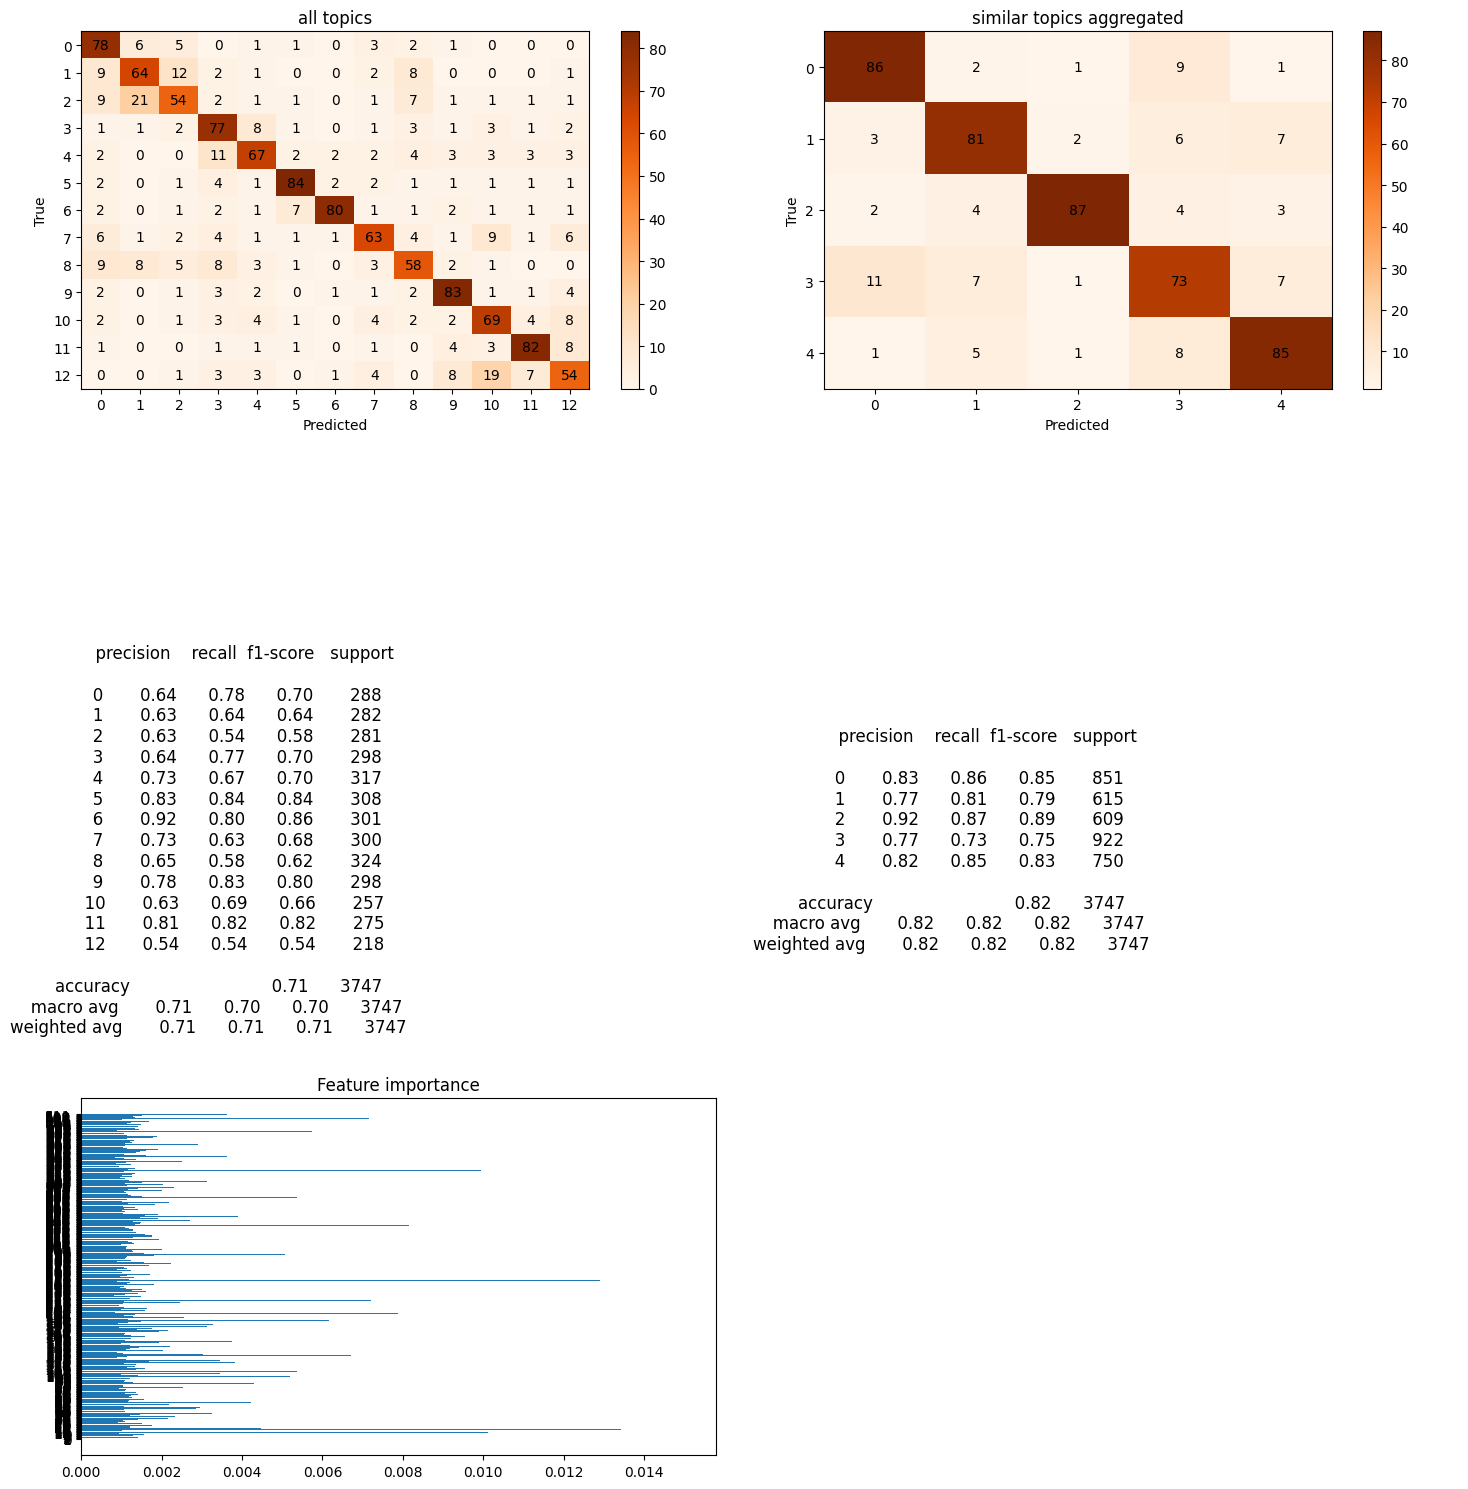

In [ ]:
# Classification
evaluator(embeddings, topics, dict_related_categories = dict_related_categories, categories = None)

## USE explainability

In [ ]:
class_centroids = centroids_classes(np.array(embeddings), topics, categories = categories)
top_terms_per_topic = []
n_top_terms = 10

for class_idx in range(0,len(categories)):
  centroid = np.array(class_centroids[class_idx])
  similarity_array = []

  for term in word_embeddings:
    similarity_array.append(scipy.spatial.distance.cosine(centroid, term)) # *np.linalg.norm(term.reshape(1,-1)) **0.5 works

  similarity_array = np.array(similarity_array).reshape([len(similarity_array)])
  top_term_indices = similarity_array.argsort()[:n_top_terms] #indices tha would sort the array so you have the word with the max importance
  top_terms = [my_words[i] for i in top_term_indices]
  top_terms_per_topic.append(top_terms)

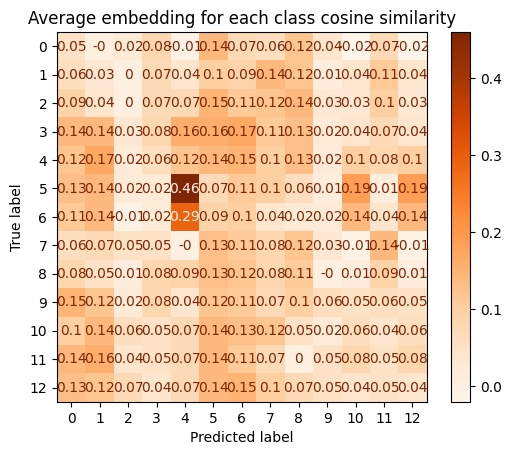

In [ ]:
cs  = cosine_similarity(np.array(class_centroids),np.array([ word_embeddings[i] for i in index_word_to_check])).round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cs)
disp.plot( cmap=plt.cm.Oranges)
plt.title('Average embedding for each class cosine similarity')
plt.show()

In [ ]:
cs  = cosine_similarity(np.array(class_centroids),np.array(class_centroids)).round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cs)
disp.plot( cmap=plt.cm.Oranges)
plt.title('Average embedding for each class cosine similarity')
plt.show()

In [ ]:
print('Most similar words in cosine similarity to the computed class average embedding')
for i in range(13):
    label = f'{label2id[i]} :'
    terms = top_terms_per_topic[i]
    print(f'{label.ljust(max_width)} {terms}')

comp.graphics :            ['quakers', 'bonjour', 'judgments', 'policeman', 'hospitalized', 'irled', 'hudson', 'leads', 'anatol', 'somalis']
comp.sys.ibm.pc.hardware : ['feudal', '486s', 'postema', '463', 'subjecting', 'policeman', 'epidemiologist', 'gasses', 'desparate', 'eduard']
comp.sys.mac.hardware :    ['feudal', 'subjecting', 'northeastern', 'postema', 'gasses', 'policeman', 'elder', 'eduard', 'transcript', 'maxtor']
rec.autos :                ['pity', 'grave', 'midnight_', 'stamp', 'abu', 'inflate', 'debating', '405', 'omer', 'imprint']
rec.motorcycles :          ['monuments', 'fart', 'virtual', 'step', 'etherfind', 'irretrievably', 'disapproved', 'albelin', 'hamilton', 'miata']
rec.sport.baseball :       ['clumsy', 'compulsory', 'nostrand', 'bikes', 'heavily', 'mechanisims', 'dvs', 'curling', 'karl', 'neighbouring']
rec.sport.hockey :         ['hack', 'coating', 'gozen', 'emi', 'commissioner', 'fledged', 'm13', 'lung', 'gxe', 'elg']
sci.crypt :                ['756', '780', '8

# Comparison with finetuning a Language model for classification

This part has the purpose to show the F1 score that is possible to obtain on this classification task fine-tunig distillBERT, with respect to the previous method there is no feature extraction (unless we extract the hidden state), and the process is supervised.
The previus methods can be used even in a semisuprevised or unsupervised setting.

# Distil BERT classification

## fine-tuning and classification

In [ ]:
# reimport data
# encode documents
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories = categories,)
texts = newsgroups.data
labels = newsgroups.target
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
encoded_data = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
# encode single words for explainabilty
encoded_words = tokenizer(list(my_words.values()), padding=True, truncation=True, return_tensors='pt')

In [ ]:
dataset = TensorDataset(encoded_data['input_ids'], encoded_data['attention_mask'], torch.tensor(labels))
word_data = TensorDataset(encoded_words['input_ids'], encoded_words['attention_mask'], torch.tensor(np.zeros(len(my_words))))

train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
# initialize model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=13)
train_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32)

optimizer = AdamW(model.parameters(), lr=2e-5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
#fine tune model

for epoch in range(3):  # You can adjust the number of epochs
    model.train()

    # Use tqdm to create a progress bar for training
    train_data_iterator = tqdm(train_dataloader, desc=f"Epoch {epoch + 1}, Training")

    for batch in train_data_iterator:
        input_ids, attention_mask, label = batch
        input_ids, attention_mask, label = input_ids.to(device), attention_mask.to(device), label.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=label)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    model.eval()

    # Use tqdm to create a progress bar for validation
    val_data_iterator = tqdm(val_dataloader, desc=f"Epoch {epoch + 1}, Validation")

    total_val_loss = 0.0
    num_val_batches = 0
    with torch.no_grad():
        for batch in val_data_iterator:
            input_ids, attention_mask, label = batch
            input_ids, attention_mask, label = input_ids.to(device), attention_mask.to(device), label.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=label)
            val_loss = outputs.loss
            total_val_loss += val_loss.item()
            num_val_batches += 1

    avg_val_loss = total_val_loss / num_val_batches
    print(f"Epoch {epoch+1}, Average Validation Loss: {avg_val_loss}")

Epoch 1, Validation: 100%|██████████| 39/39 [00:21<00:00,  1.84it/s]


Epoch 1, Average Validation Loss: 1.4811624808189197


Epoch 2, Validation: 100%|██████████| 39/39 [00:21<00:00,  1.82it/s]


Epoch 2, Average Validation Loss: 1.0126959391129322


Epoch 3, Validation: 100%|██████████| 39/39 [00:21<00:00,  1.82it/s]

Epoch 3, Average Validation Loss: 0.8875938134315686


In [ ]:
# compute predictions
test_dataloader = DataLoader(test_dataset, batch_size=1)
model.eval()

predictions = []
with torch.no_grad():
    for batch in tqdm(test_dataloader):
        input_ids, attention_mask, _ = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        logits = model(input_ids, attention_mask=attention_mask).logits
        batch_predictions = torch.argmax(logits, dim=1).tolist()
        predictions.extend(np.array(batch_predictions))

100%|██████████| 2499/2499 [00:45<00:00, 54.81it/s]


In [ ]:
# compute F1 score
test_labels = []
for item in test_dataset:
    label = item[2].item()  # Assuming labels are stored at index 2
    test_labels.append(label)

cm = confusion_matrix(test_labels, predictions)
score = f1_score(test_labels, predictions, average = 'macro')
print('F1 SCORE')
print(score)

F1 SCORE
0.8723031942032107


## Distil BERT explainability

In [ ]:
# extract documents last hidden layer

last_hidden_states = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, _ = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        output = model.distilbert(input_ids, attention_mask=attention_mask)
        last_hidden_states.append(np.array(output.last_hidden_state[:,0,:].cpu()))

In [ ]:

all_hidden_states = []
with torch.no_grad():
    for batch in tqdm(DataLoader(dataset, batch_size=1)):
        input_ids, attention_mask, _ = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        output = model.distilbert(input_ids, attention_mask=attention_mask)
        all_hidden_states.append(np.array(output.last_hidden_state[:,0,:].cpu()))

100%|██████████| 12487/12487 [03:43<00:00, 55.86it/s]


In [ ]:
# last_hidden_states_softmax = []
# with torch.no_grad():
#     for batch in test_dataloader:
#         input_ids, attention_mask, _ = batch
#         input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

#         # Forward pass to get the logits (before classification activation)
#         logits = model(input_ids, attention_mask=attention_mask).logits

#         # Append the logits to the list
#         last_hidden_states_softmax.append(np.array(logits.cpu()))

In [ ]:
# extract words last hidden layer
word_dataloader = DataLoader(word_data, batch_size=1)
word_hidden_states = []
with torch.no_grad():
    for batch in tqdm(word_dataloader):
        input_ids, attention_mask, _ = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        output = model.distilbert(input_ids, attention_mask=attention_mask)
        word_hidden_states.append(np.array(output.last_hidden_state[:,0,:].cpu())) # [:,1,:]

100%|██████████| 36498/36498 [05:06<00:00, 119.15it/s]


In [ ]:
# # extract words last hidden layer
# word_dataloader = DataLoader(word_data, batch_size=1)
# word_hidden_states_softmax = []
# with torch.no_grad():
#     for batch in tqdm(word_dataloader):
#         input_ids, attention_mask, _ = batch
#         input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

#         logits = model(input_ids, attention_mask=attention_mask).logits
#         word_hidden_states_softmax.append(np.array(logits.cpu()))

In [ ]:
word_h_state = np.array(word_hidden_states)
word_h_state = word_h_state.reshape((len(my_words),768))
# word_h_state = np.array(word_hidden_states_softmax)
# word_h_state = word_h_state.reshape((len(my_words),13))

In [ ]:
all_h_state = np.array(all_hidden_states)
all_h_state = all_h_state.reshape((len(labels),768))

In [ ]:
len(all_hidden_states[0])
32*32

1024

In [ ]:
print(last_hidden_states[0].shape)
print(len(last_hidden_states))
test_h_state = np.array(last_hidden_states)
test_h_state = test_h_state.reshape((2499,768))
# test_h_state = np.array(last_hidden_states_softmax)
# test_h_state = test_h_state.reshape((2499,13))
#print(test_h_state.shape)

(1, 768)
2499
(1, 768)
2499


In [ ]:
# Save the variables to a file

# import pickle
# with open('h_states.pkl', 'wb') as file:
#    pickle.dump((test_h_state,word_h_state, predictions, test_labels), file)
#    pickle.dump((test_h_state, word_h_state, all_h_state, predictions, test_labels, labels), file)

# with open('all_h_states.pkl', 'rb') as file:
#     loaded_variables = pickle.load(file)
# test_h_state, word_h_state, all_h_state, predictions, test_labels, labels = loaded_variables

In [ ]:
#compute centroids for each class
class_centroids = centroids_classes(np.array(test_h_state), test_labels, categories = categories)

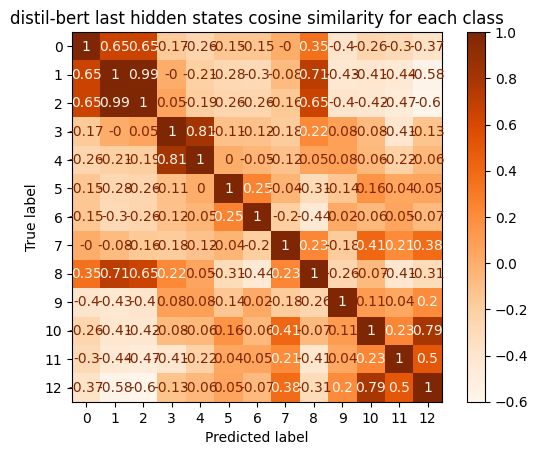

In [ ]:
# cosine similarity for each class average embedding

cs = cosine_similarity(np.array(class_centroids),np.array(class_centroids)).round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cs)
disp.plot(cmap=plt.cm.Oranges)
plt.title('distil-bert last hidden states cosine similarity for each class')
plt.show()

In [ ]:
f1_score([ np.argmax(i) for i in test_h_state], test_labels, average = 'macro')

0.8691150313834975

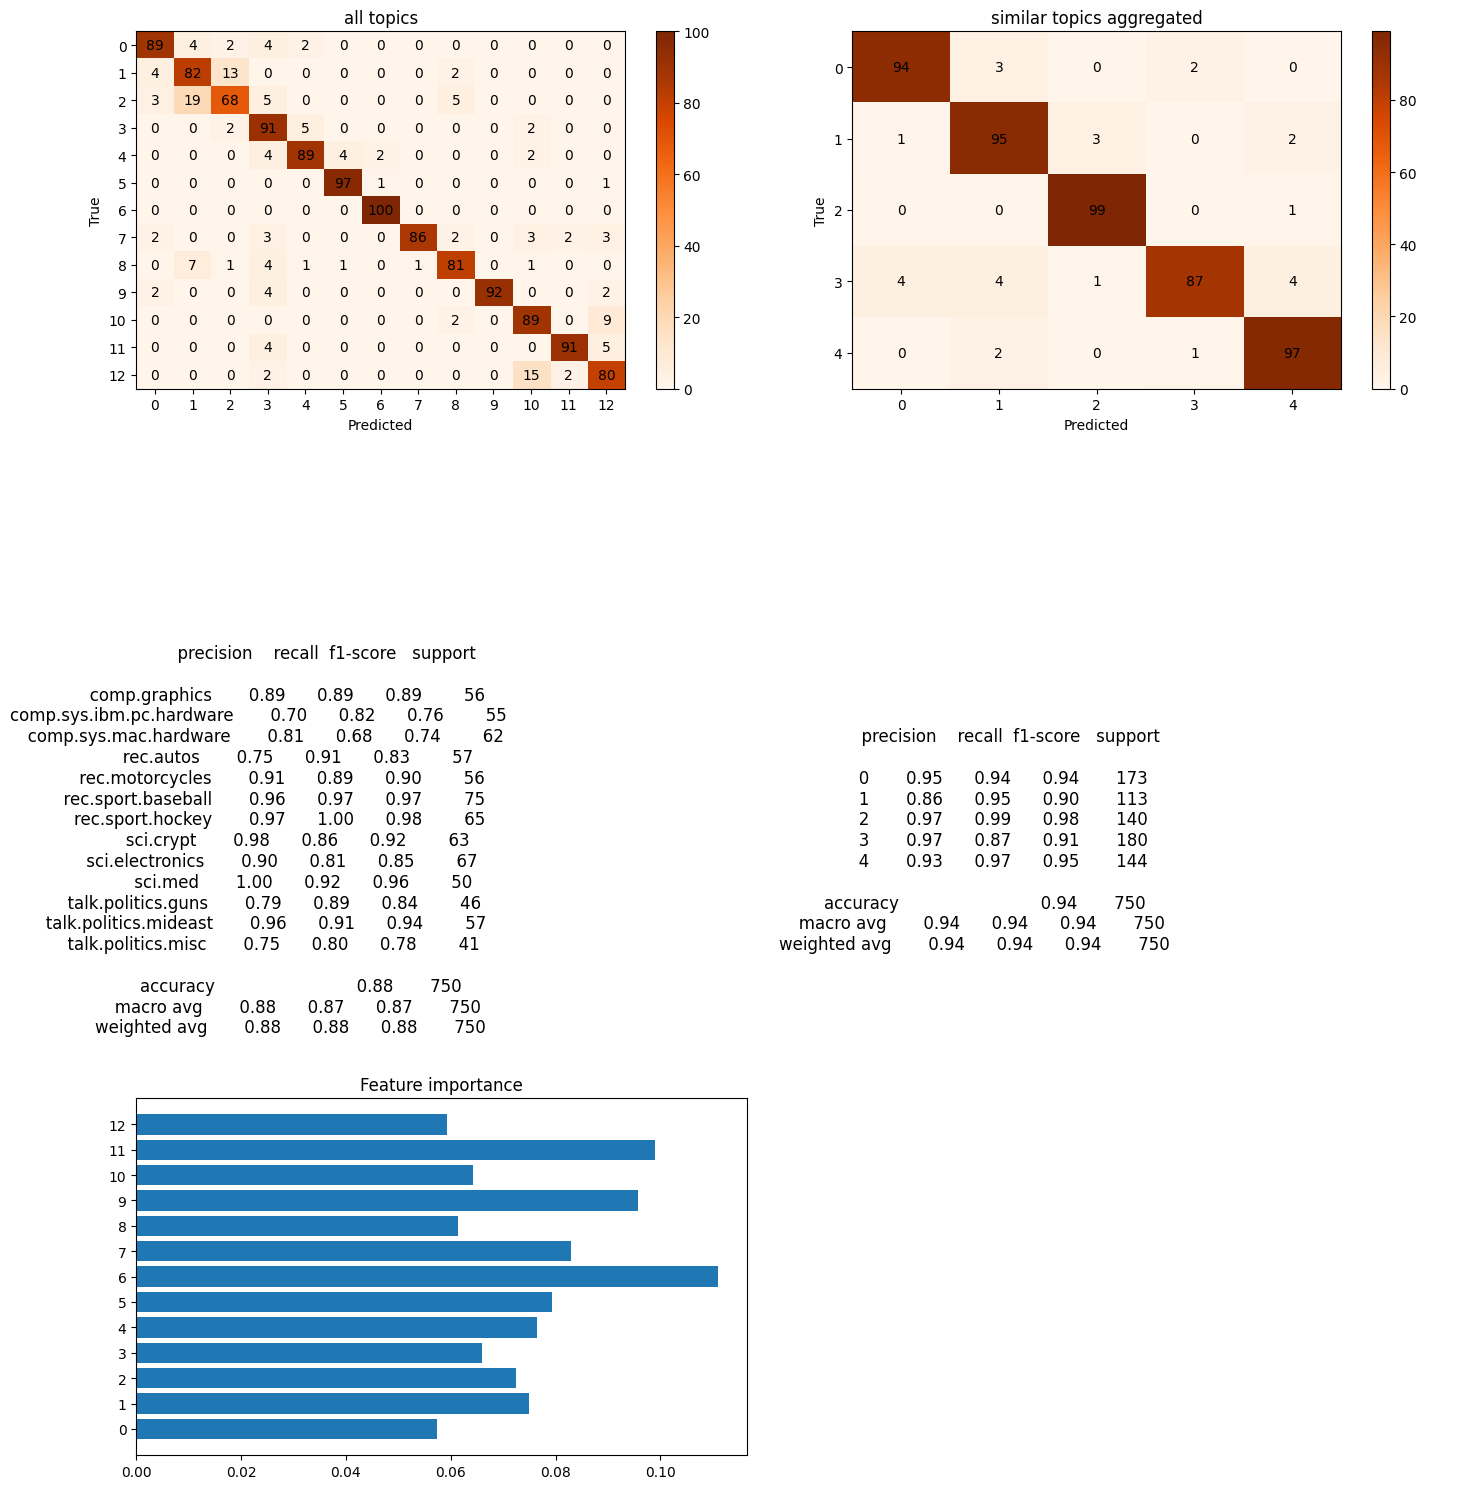

In [ ]:
evaluator(test_h_state, test_labels, dict_related_categories, categories,)

In [ ]:
# ectract most similar words to each average class embedding
top_terms_per_topic = []
n_top_terms = 10

for class_idx in tqdm(range(0,len(categories))):
  centroid = np.array(class_centroids[class_idx])
  similarity_array = []

  for term in word_h_state:
    similarity_array.append(scipy.spatial.distance.cosine(centroid, term)/(np.linalg.norm(term.reshape(1,-1)))) #**2 /(np.linalg.norm(term.reshape(1,-1))**2) **0.5 works

  similarity_array = np.array(similarity_array).reshape([len(similarity_array)])
  top_term_indices = similarity_array.argsort()[:n_top_terms] #indices tha would sort the array so you have the word with the max importance
  top_terms = [my_words[i] for i in top_term_indices]
  top_terms_per_topic.append(top_terms)

100%|██████████| 13/13 [01:08<00:00,  5.27s/it]


In [ ]:
for i in range(13):
    label = f'{label2id[i]} :'
    terms = top_terms_per_topic[i]
    print(f'{label.ljust(max_width)} {terms}')

comp.graphics :            ['hood', 'simmons', 'jimmy', 'puck', 'horribly', '329', 'hypocrisy', 'proves', 'specialised', 'khimik']
comp.sys.ibm.pc.hardware : ['minus', 'rapacity', '4800', 'uxa', 'hdtv', '06066', 'igor_larionov', 'outscore', 'ambushed', 'legislative']
comp.sys.mac.hardware :    ['fishes', 'minus', 'prosecutor', 'rapacity', 'fiasko', '486dlc', 'tms', 'concessions', 'comittee', '4800']
rec.autos :                ['672', 'mif', '664', 'dance', '6674', 'abundantly', 'favourite', 'starvation', 'would', '7140']
rec.motorcycles :          ['jour', 'invincible', 'application', 'mfm', 'rosenthal', 'mugger', 'albelin', 'mcats', 'contracts', 'gentler']
rec.sport.baseball :       ['neighbours', '916', 'fatalities', '1995', 'cipriani', 'donors', 'parlour', 'notebooks', '9080', 'mitigated']
rec.sport.hockey :         ['garaged', 'myopia', 'municipality', 'coasting', 'contries', 'committees', 'setver', '68010', 'medieval', 'bli']
sci.crypt :                ['32w', 'poisonous', 'diplom

In [ ]:
# ectract most similar words to each average class embedding
top_terms_per_topic = []
n_top_terms = 10

for class_idx in tqdm(range(0,len(categories))):
  centroid = np.array(class_centroids[class_idx])
  similarity_array = []

  for term in word_h_state:
    similarity_array.append(np.dot(centroid, term)) # /(np.linalg.norm(term.reshape(1,-1))**2) **0.5 works

  similarity_array = np.array(similarity_array).reshape([len(similarity_array)])
  top_term_indices = similarity_array.argsort()[::-1][:n_top_terms] #indices tha would sort the array so you have the word with the max importance
  top_terms = [my_words[i] for i in top_term_indices]
  top_terms_per_topic.append(top_terms)

100%|██████████| 13/13 [00:02<00:00,  5.16it/s]


In [ ]:
for i in range(13):
    label = f'{label2id[i]} :'
    terms = top_terms_per_topic[i]
    print(f'{label.ljust(max_width)} {terms}')

comp.graphics :            ['patchlevel', 'utilizing', 'specialised', 'chords', 'horribly', 'v2', 'transient', 'zoning', 'uzan', 'completed']
comp.sys.ibm.pc.hardware : ['06066', 'previa', 'igor_larionov', 'uxa', 'zurich', 'minus', 'vantage', 'hdtv', 'ambushed', 'eur']
comp.sys.mac.hardware :    ['minus', 'previa', '06066', 'uxa', 'rapacity', 'ambushed', 'fiasko', 'zurich', 'igor_larionov', 'amherst']
rec.autos :                ['sheer', 'elitist', 'encryped', 'dance', 'months', 'rusting', 'mopac', 'abundantly', 'ati', 'mif']
rec.motorcycles :          ['stamp', '1053', '5500', 'adversely', 'pov', 'adriatic', 'tablets', 'healy', 'soldier', 'jour']
rec.sport.baseball :       ['fatalities', 'parlour', 'neighbours', '9080', 'cipriani', 'commentary', '916', '1995', 'upside', 'notebooks']
rec.sport.hockey :         ['garaged', 'myopia', '68010', 'municipality', 'medieval', 'contries', 'committees', 'coasting', 'garrett', 'setver']
sci.crypt :                ['diplomats', 'poisonous', '32w',

In [ ]:
# ectract most similar words to each average class embedding
top_terms_per_topic = []
n_top_terms = 10

for class_idx in tqdm(range(0,len(categories))):
  centroid = np.array(class_centroids[class_idx])
  similarity_array = []

  for term in word_h_state:
    similarity_array.append(np.linalg.norm(centroid - term, ord=1)) # /(np.linalg.norm(term.reshape(1,-1))**2) **0.5 works

  similarity_array = np.array(similarity_array).reshape([len(similarity_array)])
  top_term_indices = similarity_array.argsort()[:n_top_terms] #indices tha would sort the array so you have the word with the max importance
  top_terms = [my_words[i] for i in top_term_indices]
  top_terms_per_topic.append(top_terms)

100%|██████████| 13/13 [00:02<00:00,  5.07it/s]


In [ ]:
for i in range(13):
    label = f'{label2id[i]} :'
    terms = top_terms_per_topic[i]
    print(f'{label.ljust(max_width)} {terms}')

comp.graphics :            ['flame', 'hypocrisy', 'drinkers', 'khimik', 'proves', 'hynes', 'worship', 'sleepy', 'jagr', 'pucc']
comp.sys.ibm.pc.hardware : ['kaleidagraph', 'hiller', 'uxa', '1164', 'boldly', 'ambushed', 'zurich', 'vantage', 'eur', '06066']
comp.sys.mac.hardware :    ['minus', 'prosecutor', 'fishes', 'fiasko', 'pkg', 'cesa', 'rapacity', '486dlc', 'concessions', 'windshield']
rec.autos :                ['400mb', 'card', 'shut', 'pd', '300x300', 'pcx', '1066', 'accompanied', '66v', 'bullets']
rec.motorcycles :          ['premiere', 'waterfal', 'sui', 'adaptive', 'phew', 'application', 'amoco', 'disc', 'powering', 'sillinger']
rec.sport.baseball :       ['918', '45', 'upside', 'atleast', 'springs', '4440', 'compound', 'fatalities', '679', 'neighbours']
rec.sport.hockey :         ['municipality', 'setver', '68010', 'garaged', 'coasting', 'strategies', 'committees', 'commissioner', 'bli', 'communal']
sci.crypt :                ['elec', 'carol', 'insulated', '793', 'praetzel',

In [ ]:
top_terms_per_topic = []
n_top_terms = 10

for class_idx in tqdm(range(0,len(categories))):
  similarity_array = []

  for term in word_h_state:
    similarity_array.append(term[class_idx]) # -np.sum(term)

  similarity_array = np.array(similarity_array).reshape([len(similarity_array)])
  top_term_indices = similarity_array.argsort()[::-1][:n_top_terms] #indices tha would sort the array so you have the word with the max importance
  top_terms = [my_words[i] for i in top_term_indices]
  top_terms_per_topic.append(top_terms)

100%|██████████| 13/13 [00:00<00:00, 22.69it/s]


In [ ]:
for i in range(13):
    label = f'{label2id[i]} :'
    terms = top_terms_per_topic[i]
    print(f'{label.ljust(max_width)} {terms}')

comp.graphics :            ['hood', 'jimmy', 'proves', 'puck', 'jap', 'joe_sakic', '329', 'hypocrisy', 'hynes', 'simmons']
comp.sys.ibm.pc.hardware : ['minus', 'uxa', '06066', 'igor_larionov', '4800', 'outscore', 'vantage', 'hdtv', 'kaleidagraph', 'indecent']
comp.sys.mac.hardware :    ['fishes', 'tms', 'comittee', 'prosecutor', 'concessions', '4mb', 'wimsey', 'along', 'fiasko', 'cesa']
rec.autos :                ['664', '6674', 'mif', 'accept', '7140', 'abundantly', 'starvation', 'favourite', 'pd', 'chamber']
rec.motorcycles :          ['jour', 'invincible', '5500', 'albelin', 'application', 'iconic', 'mfm', 'healy', 'dendrite', 'gentler']
rec.sport.baseball :       ['neighbours', '916', 'fatalities', '1995', 'cipriani', 'commentary', 'notebooks', 'parlour', '______________________________________________________________________________', 'donors']
rec.sport.hockey :         ['garaged', '68010', 'myopia', 'municipality', 'medieval', 'contries', 'committees', 'coasting', 'setver', 'bli

In [ ]:
#model.save_pretrained("saved_model/")
#load
# DistilBertForSequenceClassification.from_pretrained("path_to_save_directory").

# final explain

In [ ]:
text = "I have a bike, i love to play baseball"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
cls_explainer = SequenceClassificationExplainer( model, tokenizer)
attributions = cls_explainer(text,)

cls_explainer.visualize("distilbert_example.html")

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
4,LABEL_4 (0.65),LABEL_4,0.42,"[CLS] i have a bike , i love to play baseball [SEP]"


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
4,LABEL_4 (0.65),LABEL_4,0.42,"[CLS] i have a bike , i love to play baseball [SEP]"


In [ ]:
text = "I have seen bombing in palestine and israel"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
attributions = cls_explainer(text)

cls_explainer.visualize("distilbert_example.html")

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
11,LABEL_11 (0.90),LABEL_11,2.30,[CLS] i have seen bombing in palestine and israel [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
11,LABEL_11 (0.90),LABEL_11,2.30,[CLS] i have seen bombing in palestine and israel [SEP]


In [ ]:
errors_indexes = np.array([i for i in range(len(test_labels))])[np.array(test_labels) != np.array(predictions)] # errors
for i in range(5):
  error_to_see = errors_indexes[i*15+1]
  print('True label: ', categories[test_labels[error_to_see]])
  print('predicted label: ', categories[predictions[error_to_see]])
  decoded_texts = tokenizer.decode(test_dataset[error_to_see][0], skip_special_tokens=True)

  inputs = tokenizer(decoded_texts, return_tensors="pt", padding=True, truncation=True)
  attributions = cls_explainer(decoded_texts)

  cls_explainer.visualize()

True label:  comp.graphics
predicted label:  comp.sys.ibm.pc.hardware


True label:  comp.sys.mac.hardware
predicted label:  comp.sys.ibm.pc.hardware


True label:  comp.graphics
predicted label:  sci.crypt


True label:  talk.politics.mideast
predicted label:  talk.politics.misc


True label:  sci.electronics
predicted label:  rec.autos


True label:  comp.sys.mac.hardware
predicted label:  comp.sys.ibm.pc.hardware


True label:  rec.motorcycles
predicted label:  talk.politics.guns


True label:  talk.politics.mideast
predicted label:  talk.politics.misc


True label:  comp.sys.ibm.pc.hardware
predicted label:  rec.autos


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
3,LABEL_3 (0.10),LABEL_3,nan,[CLS] [SEP]


True label:  comp.sys.ibm.pc.hardware
predicted label:  comp.sys.mac.hardware


In [ ]:
#saved the most important words form previus other methods and look if they get correctly classified

aggregated_texts = [' '.join(terms) for terms in saved_terms]

# Initialize a SequenceClassificationExplainer
cls_explainer = SequenceClassificationExplainer(model, tokenizer)

# Initialize a list to store attributions
all_attributions = []

# Loop through each aggregated text and explain the predictions
for text in aggregated_texts:
    # Explain the predictions for the text
    attributions = cls_explainer(text)

    # Append the attributions to the list
    all_attributions.append(attributions)
    cls_explainer.visualize("distilbert_example.html")

# Visualize the attributions


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,LABEL_0 (0.88),LABEL_0,3.11,[CLS] graphics image program file files ft ##p software format available gi ##f [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
2,LABEL_2 (0.63),LABEL_2,1.94,[CLS] drive sc ##si mac card bus need system controller problem monitor [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
2,LABEL_2 (0.64),LABEL_2,1.67,[CLS] card monitor mac video bus need apple work problem board [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
4,LABEL_4 (0.74),LABEL_4,1.81,[CLS] car bike cars engine new miles get back oil ride [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
4,LABEL_4 (0.79),LABEL_4,0.91,[CLS] car bike new cars get engine back one much miles [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
6,LABEL_6 (0.86),LABEL_6,2.81,[CLS] game team games year hockey last baseball season players play [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
6,LABEL_6 (0.87),LABEL_6,2.78,[CLS] game team games year hockey season play baseball last players [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
7,LABEL_7 (0.87),LABEL_7,3.05,[CLS] key chip encryption clip ##per keys es ##crow algorithm phone public nsa [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,LABEL_0 (0.27),LABEL_0,1.03,[CLS] could also know need get would help one anyone etc [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,LABEL_1 (0.33),LABEL_1,3.14,[CLS] ed ##u one get people know could much ge ##b ds ##l n ##3 ##j ##x ##p [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
10,LABEL_10 (0.39),LABEL_10,0.63,[CLS] people one right gun us even make believe well many [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
11,LABEL_11 (0.89),LABEL_11,2.71,[CLS] israel jews israeli jewish arab arabs peace war land state [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
10,LABEL_10 (0.40),LABEL_10,0.69,[CLS] people one right gun us even make well believe many [SEP]


In [ ]:
top_terms_per_class = {class_idx: [] for class_idx in range(model.config.num_labels)}

# Loop through each text and make predictions
for text in list(my_words.values())[:2000]:
    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)

    # Make predictions using the model
    with torch.no_grad():
        logits = model(**inputs).logits

    # Get the predicted class and its corresponding score
    predicted_class = torch.argmax(logits, dim=1).item()
    score = torch.softmax(logits, dim=1).max().item()

    # Update the list of terms for the corresponding class
    terms = tokenizer.tokenize(text)
    top_terms = top_terms_per_class[predicted_class]
    top_terms.extend(terms)

    # Keep only the top 5 terms for each class
    top_terms_per_class[predicted_class] = sorted(top_terms, key=lambda x: -top_terms.count(x))[:5]

# Print one line for each class with the top 5 terms and the rounded score
for class_idx, terms in top_terms_per_class.items():
    terms_str = ', '.join(terms[:5])
    print(f"Class {class_idx}: Terms: {terms_str}")

Class 0: Terms: use, use, _, _, take
Class 1: Terms: mother, ##board, 38, ##6, ##s
Class 2: Terms: service, updates, previously, available, services
Class 3: Terms: entire, world, especially, late, tv
Class 4: Terms: compliment, coast, weekly, pay, way
Class 5: Terms: baseball, dodgers, angels, toss, ball
Class 6: Terms: east, final, scores, west, games
Class 7: Terms: _, _, _, _, _
Class 8: Terms: mine, charge, chi, ##mes, type
Class 9: Terms: either, branches, grows, response, j
Class 10: Terms: newspapers, ak, ##29, ##6, cad
Class 11: Terms: 98, ##6, joseph, al, ##ot
Class 12: Terms: agree, gangs, stan, ##is, ##law


In [ ]:
decoded_texts

"on the other side of the fence, i owned a bieffe off - road helmet. took what i would consider a minor fall, and had visible damage to the shell. yes, the helmet did its job. but the damage / impact ratio was scary. i own bell moto - 5 now, have taken impacts on order of twice the bieffe impact ( we do this frequently in mx ), and don't even have a scratch on it after two seasons. my recommendation is to buy _ high _ quality gear. ymmv."

## captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00


In [ ]:
from captum.attr import IntegratedGradients

In [ ]:
def calculate_attributions(input_text, target_class):
    # Tokenizza il testo di input
    input_ids = tokenizer(input_text, return_tensors='pt', truncation=True, padding=True)['input_ids'].to(device)
    print(input_ids)
    # Esegui l'inferenza del modello
    output = model(input_ids)

    # Estrai la probabilità associata alla classe target
    target_prob = output.logits[0][target_class].item()

    # Calcola l'attribuzione utilizzando Integrated Gradients
    integrated_gradients = IntegratedGradients(model)
    attributions = integrated_gradients.attribute(input_ids, target=target_class)



    return attributions, target_prob



# Esempio di utilizzo per una classe specifica (cambia target_class in base alle tue 20 classi)
target_class = torch.LongTensor([0]).to(device)  # Sostituisci con la classe di interesse
print(target_class)
input_text = "the race was dominated by the ducati from the beginning"



# Calcola attribuzioni per la classe specifica
attributions, target_prob = calculate_attributions(input_text, target_class)



# Estrai i token con attribuzioni più alte (puoi personalizzare la soglia)
threshold = 0.2
important_tokens = [token for token, attr in zip(tokenizer.convert_ids_to_tokens(input_ids[0]), attributions[0]) if abs(attr) > threshold]



print("Token importanti:", important_tokens)
print("Probabilità per la classe target:", target_prob)

tensor([0], device='cuda:0')
tensor([[  101,  1996,  2679,  2001,  6817,  2011,  1996, 26363, 10450,  2013,
          1996,  2927,   102]], device='cuda:0')


RuntimeError: ignored

In [ ]:
def calculate_attributions(input_text, target_class):
    # Tokenizza il testo di input
    input_ids = tokenizer(input_text, return_tensors='pt', truncation=True, padding=True)['input_ids'].to(device).to(torch.int64)
    # print(input_ids[0])
    # print(input_ids.shape)
    # Esegui l'inferenza del modello
    output = model(input_ids)
    # print(output)

    # Estrai la probabilità associata alla classe target
    target_prob = output.logits[0][target_class].item()

    # Calcola l'attribuzione utilizzando Integrated Gradients
    integrated_gradients = IntegratedGradients(model)
    attributions = integrated_gradients.attribute(input_ids, target=target_class)
    #attributions = integrated_gradients.attribute(input_ids,)
    print(attributions.shape)

    #attributions_for_target_class = attributions[0][target_class]

    # Extract the probability associated with the target class
    #target_prob = output.logits[0][target_class].item()

    return attributions, target_prob



# Esempio di utilizzo per una classe specifica (cambia target_class in base alle tue 20 classi)
target_class = 0  # Sostituisci con la classe di interesse
input_text = "The match ."



# Calcola attribuzioni per la classe specifica
attributions, target_prob = calculate_attributions(input_text, target_class)



# Estrai i token con attribuzioni più alte (puoi personalizzare la soglia)
threshold = 0.2
important_tokens = [token for token, attr in zip(tokenizer.convert_ids_to_tokens(input_ids[0]), attributions[0]) if abs(attr) > threshold]



print("Token importanti:", important_tokens)
print("Probabilità per la classe target:", target_prob)

NameError: ignored

In [ ]:
import captum
print(torch.__version__)
print(captum.__version__)

2.1.0+cu118
0.6.0


## Shap

In [ ]:
text = "This movie was amazing!"

# Encode input text
encoded_text = tokenizer(text, padding='max_length', truncation=True, return_tensors='pt').to(device)

# Make model prediction
with torch.no_grad():
    output = model(**encoded_text)
    #prediction = output.logits.argmax(-1).item()

# Create SHAP explainer
explainer = shap.TreeExplainer(model, tokenizer)

# Generate SHAP values
shap_values = explainer(encoded_text)

# Interpret SHAP values
shap.plots.bar(shap_values)

InvalidMaskerError: ignored

In [ ]:
text = "Your input text goes here"
encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
input_ids = encoded_input["input_ids"].to(device)
attention_mask = encoded_input["attention_mask"].to(device)

# Define a custom forward function to handle inputs
def forward_func(input_ids):
    return model(input_ids).argmax()

# Create a SHAP explainer using DeepExplainer
explainer = shap.DeepExplainer(forward_func,torch.tensor([[input_ids]]))
shap_values = explainer.shap_values(input_ids)

# Visualize SHAP values for text
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], encoded_input['input_ids'])


TypeError: ignored

In [ ]:
def custom_tokenizer(text, return_offsets_mapping=True):
    text = text.lower()
    splitted_text_list = tokenizer(text)
    pos_list = []
    pos=0
    for item in splitted_text_list:
      start = text.find(item, pos)
      end = start + len(item)
      pos_list.append((start, end))
      pos = end
    out={}
    out["input_ids"] = splitted_text_list
    if return_offsets_mapping:
      out['offset_mapping']=pos_list
    return out

explainer = shap.Explainer(f, masker)

NameError: ignored

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers_interpret import SequenceClassificationExplainer


model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

cls_explainer = SequenceClassificationExplainer("I love you, I like you", model, tokenizer)
attributions = cls_explainer()

print(attributions.word_attributions)
cls_explainer.visualize("distilbert_example.html")

ModuleNotFoundError: ignored

In [ ]:
text = "Your input text goes here."

# Preprocess your input data and tokenize it
max_length = len(text.split())

# Encode input text with reduced maximum length
encoded_text = tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt').to(device)

attention_mask = torch.ones_like(encoded_text['input_ids'])
attention_mask[(encoded_text['input_ids'] == tokenizer.pad_token_id)] = 0

# Make model prediction with attention mask
with torch.no_grad():
    output = model(**encoded_text['input_ids'], attention_mask=attention_mask)
    prediction = output.logits.argmax(-1).item()

# Explain the model's prediction for the given input
shap_values = explainer(encoded_text, attention_mask=attention_mask)

# Visualize the explanations using SHAP's built-in plotting functions
shap.summary_plot(shap_values, feature_names=tokenizer.convert_ids_to_tokens(tokens['input_ids'][0]))

TypeError: ignored

In [ ]:
tokens['input_ids'][0]

tensor([ 101, 2115, 7953, 3793, 3632, 2182, 1012,  102], device='cuda:0')

In [ ]:
from lime.lime_text import LimeTextExplainer
def predict(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt").to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    return probabilities
explainer = LimeTextExplainer(class_names=[i+1 for i in range(13)])

# Define a text input you want to explain
text_to_explain = "This is a sample text for explanation."

# Explain the prediction for the text
explanation = explainer.explain_instance(text_to_explain, predict, num_features=10)

# Print the explanation
explanation.show_in_notebook()

OutOfMemoryError: ignored

In [ ]:
del encoded_text

## cluster K means


In [ ]:
test_h_state, word_h_state, all_h_state, predictions, test_labels, labels = loaded_variables

In [ ]:
#cosine_similarities = cosine_similarity(word_h_state, test_h_state)

In [ ]:
# test_h_state word_h_state labels

from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors model
n_neighbors = 13*15  # Set the number of neighbors you want
knn_model = NearestNeighbors(n_neighbors=n_neighbors,  ) #metric='cosine',

# Fit the model with word_h_states
knn_model.fit(all_h_state)

# Find the closest labels for each test_h_state
closest_labels = []
for word_state in tqdm(word_h_state):
    distances, indices = knn_model.kneighbors([word_state])
    closest_labels.append([labels[i] for i in indices[0]])

100%|██████████| 36498/36498 [18:46<00:00, 32.39it/s]


In [ ]:
print(len(closest_labels))
print(closest_labels[0])

36498
[4, 6, 11, 5, 4, 1, 2, 11, 5, 2, 2, 1, 5, 5, 5, 3, 7, 1, 3, 4, 9, 6, 6, 5, 11, 3, 3, 8, 2, 4, 4, 10, 4, 11, 11, 3, 8, 11, 1, 10, 6, 10, 3, 2, 2, 11, 3, 2, 5, 6, 2, 3, 4, 8, 11, 7, 6, 1, 12, 3, 6, 9, 4, 11, 4, 7, 2, 10, 2, 9]


In [ ]:
from collections import Counter

In [ ]:
most_common_labels = []
for word_labels in closest_labels:
    label_counts = Counter(word_labels)
    most_common_label, most_common_count = label_counts.most_common(1)[0]
    most_common_labels.append((most_common_label, most_common_count))

In [ ]:
Counter(closest_labels[word_indexes['bike']])

Counter({11: 9,
         5: 6,
         6: 6,
         1: 5,
         4: 11,
         3: 10,
         2: 10,
         12: 1,
         10: 4,
         8: 2,
         7: 3,
         9: 3})

In [ ]:
Counter([4,5,5,5,6,6])

Counter({4: 1, 5: 3, 6: 2})

In [ ]:
for i in most_common_labels:
  if i[1]>=50 and i[0]==0:
    print(i)

(0, 52)
(0, 59)
(0, 61)
(0, 60)
(0, 63)
(0, 54)
(0, 58)
(0, 64)
(0, 65)
(0, 66)
(0, 51)
(0, 50)
(0, 54)
(0, 52)
(0, 69)
(0, 67)
(0, 55)
(0, 69)
(0, 67)


In [ ]:
for lab in range(13):
  #lab = 0
  most_common_labels
  indices = [i for i, (a, b) in enumerate(most_common_labels) if a == lab]

  # Sort the indices by the corresponding b values in descending order
  indices.sort(key=lambda i: most_common_labels[i][1], reverse=True)

  # Get the top 10 indices
  top_10_indices = indices[:10]
  top_10 = [my_words[i] for i in top_10_indices]

  # for i in range(13):
  #     label = f'{label2id[i]} :'
  #     terms = top_terms_per_topic[i]
  #     print(f'{label.ljust(max_width)} {terms}')
  print(top_10)

['uucico', 'v8s', 'uvcc', 'xflick', 'prying', 'kalwani', 'joe_sakic', 'hospitalized', 'horrendous', 'horrible']
['utopic', 'sunysb', 'rank', 'ganja', 'supercharged', 'videotape', 'patchlevel', 'xmol', 'supercells', 'fda']
['map', 'sparky', 'fiasko', 'prosecutor', 'uzis', 'xfer', 'eller', 'utsa', 'misadventure', 'pneumatic']
['favourite', 'vulnerabilities', 'gentler', 'justify', 'pounds', 'reflective', 'lane', 'lobbing', 'jeff', 'puked']
['militants', 'irretrievably', 'sensitive', 'bernie_nicholls', 'hamilton', 'doughty', 'gandalf', 'gaoler', 'gannon', 'suicidal']
['founders', 'je', 'frighten', 'anil', 'approach', 'crony', 'dancers', 'fairgrounds', 'fortuned', 'fpgas']
['formic', 'frost', 'garaged', 'fp1', 'gang', 'medieval', 'frozen', 'garrett', 'freeze', 'framemaker']
['8163', 'subverting', 'bulgarian', 'viet', '108', 'diplomats', 'poised', 'poisonous', 'praetzel', 'testified']
['rwhitaker', 'uwaterloo', 'rws', 'wherein', 'sciences', 'shi', 'lori', 'gulp', 'esposito', 'uprising']
['11

## cluster HDBSCAN

In [ ]:
#!pip install -U scikit-learn
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039183 sha256=36c7f2495ab27806d7e8bf857d6251a2f284efbfa8784532c1d3343b91b367d7
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.4
    Uninstalling Cython-3.0.4:
      Successfully uninstalled Cython-3.0.4


In [ ]:
## cluster HDBSCAn
import numpy as np
#from sklearn.cluster import HDBSCAN
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from hdbscan import HDBSCAN
from sklearn.metrics import purity_score

In [ ]:
import hdbscan

In [ ]:
# Create an HDBSCAN object
hdb = HDBSCAN(min_cluster_size=40, min_samples=10, prediction_data=True)

# Fit the HDBSCAN object to the training data
hdb.fit(all_h_state)
y_pred = hdb.labels_

# Predict the labels for the test data
#y_pred = hdb.predict(word_h_state)

#print(labels, hdb.labels)

In [ ]:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(labels, y_pred)
print("ARI Score:", ari_score)

ARI Score: 0.25633838044166


In [ ]:
from collections import Counter
unique_predicted_labels = np.unique(y_pred)

for predicted_label in unique_predicted_labels:
    true_labels_for_predicted = [true_label for true_label, pred_label in zip(labels, y_pred) if pred_label == predicted_label]

    if len(true_labels_for_predicted) > 0:
        most_common_true_label = max(set(true_labels_for_predicted), key=true_labels_for_predicted.count)
        percentage_most_common = (true_labels_for_predicted.count(most_common_true_label) / len(true_labels_for_predicted)) * 100
        print(f"Predicted Label {predicted_label}: Most Common True Label {most_common_true_label}, Percentage: {percentage_most_common:.2f}%")

unique_true_labels = np.unique(labels)

for true_labelll in unique_true_labels:
    predicted_labels_for_true = [pred_label for true_label, pred_label in zip(labels, y_pred) if true_label == true_labelll]

    if len(predicted_labels_for_true) > 0:
        most_common_predicted_label = max(set(predicted_labels_for_true), key=predicted_labels_for_true.count)
        percentage_most_common = (predicted_labels_for_true.count(most_common_predicted_label) / len(predicted_labels_for_true)) * 100
        print(f"True Label {true_labelll}: Most Common Predicted Label {most_common_predicted_label}, Percentage: {percentage_most_common:.2f}%")

label_counts = Counter(y_pred)
total_predictions = len(y_pred)

for label, count in label_counts.items():
    percentage = (count / total_predictions) * 100
    print(f"Predicted Label {label}: {percentage:.2f}%")

Predicted Label -1: Most Common True Label 12, Percentage: 16.41%
Predicted Label 0: Most Common True Label 3, Percentage: 15.59%
Predicted Label 1: Most Common True Label 5, Percentage: 99.03%
Predicted Label 2: Most Common True Label 6, Percentage: 99.74%
Predicted Label 3: Most Common True Label 9, Percentage: 96.83%
Predicted Label 4: Most Common True Label 11, Percentage: 98.07%
Predicted Label 5: Most Common True Label 1, Percentage: 22.68%
Predicted Label 6: Most Common True Label 4, Percentage: 100.00%
Predicted Label 7: Most Common True Label 3, Percentage: 93.45%
Predicted Label 8: Most Common True Label 10, Percentage: 84.90%
Predicted Label 9: Most Common True Label 12, Percentage: 100.00%
True Label 0: Most Common Predicted Label 5, Percentage: 71.12%
True Label 1: Most Common Predicted Label 5, Percentage: 89.71%
True Label 2: Most Common Predicted Label 5, Percentage: 82.76%
True Label 3: Most Common Predicted Label 7, Percentage: 60.51%
True Label 4: Most Common Predict

In [ ]:
hdb.probabilities_

array([0.40004415, 0.        , 1.        , ..., 0.        , 1.        ,
       0.83917173])

In [ ]:
test_labels_preds, strengths = hdbscan.approximate_predict(hdb, word_h_state)

In [ ]:
label_counts = Counter(test_labels_preds)
total_predictions = len(test_labels_preds)
for test_labels, count in label_counts.items():
    percentage = (count / total_predictions) * 100
    print(f"Predicted Label {test_labels}: {percentage:.2f}%")

Predicted Label 0: 98.65%
Predicted Label -1: 1.33%
Predicted Label 3: 0.02%
Predicted Label 5: 0.00%


In [ ]:
top_words_by_label = {}  # Dictionary to store top words for each label

for label in np.unique(test_labels):
    indices_for_label = np.where(test_labels == label)[0]
    print(len(indices_for_label))
    strengths_for_label = strengths[indices_for_label]

    # Get the indices of the top 10 words for this label based on strength
    top_10_indices = np.argpartition(-strengths_for_label, 10)[:10]

    # Get the actual words for the top 10 indices
    top_10_words = [my_words[indices_for_label[i]] for i in top_10_indices]

    top_words_by_label[label] = top_10_words

# Print the top 10 words for each label
for label, top_words in top_words_by_label.items():
    print(f"Top 10 words for Label {label}: {', '.join(top_words)}")

1


ValueError: ignored

# Lbl2Vec

Lbl2Vec is an algorithm for unsupervised document classification and unsupervised document retrieval. It automatically generates jointly embedded label, document and word vectors and returns documents of topics modeled by manually predefined keywords. This package includes two different model types. The plain Lbl2Vec model uses Doc2Vec, and Lbl2TransformerVec uses transformer-based language models to create the embeddings.



1.   Keywords are manually defined for each topic
2.   Create jointly embedded document and word vectors using Doc2Vec (or sentence transformers)
3.  Find document vectors that are similar to the keyword vectors of each topic.
4. Clean outlier document vectors for each topic
5. Compute centroids
6.  Compute label vector <-> document vector similarities for each label vector and document vector in the dataset.



In [ ]:
# for each label we need keywords
x_train, x_val, label_train, label_val = train_test_split(documents, topics, test_size=0.3, random_state=random_state)
categories = [
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",

    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",

]
label_id = list(range(len(categories)))
keyword = [['graphics','ram'],
           ['pc','ibm'],
           ['mac'],
           ['autos', 'car'],
           ['motorcycles', 'bike', 'motor'],
           ['baseball'],
           ['hockey'],
           ['encryption', 'privacy'],
           ['electronics','phone'],
           ['medicine', 'treatment', 'disease'],
           ['guns', 'own', 'freedom', ],
           ['israeli', 'jews', 'arab', 'palestinian'],
           ['politics', 'government', 'armenian', 'russian', 'genocide'],
          ]
label_df = pd.DataFrame()
label_df['class_index'] = label_id
label_df['class_name'] = categories
label_df['keywords'] = keyword
label_df['number_of_keywords'] = label_df['keywords'].map(len)
print(label_df)
newsgroup_train = pd.DataFrame(np.array([x_train, [int(l) for l in label_train]]).T.tolist() , columns = ['text', 'class_index'])
newsgroup_test = pd.DataFrame(np.array([x_val, [int(l) for l in label_val]]).T.tolist(), columns = ['text', 'class_index'])
newsgroup_train['class_index'] = newsgroup_train['class_index'].astype('int')
newsgroup_test['class_index']  =newsgroup_test['class_index'].astype('int')

    class_index                class_name  \
0             0             comp.graphics   
1             1  comp.sys.ibm.pc.hardware   
2             2     comp.sys.mac.hardware   
3             3                 rec.autos   
4             4           rec.motorcycles   
5             5        rec.sport.baseball   
6             6          rec.sport.hockey   
7             7                 sci.crypt   
8             8           sci.electronics   
9             9                   sci.med   
10           10        talk.politics.guns   
11           11     talk.politics.mideast   
12           12        talk.politics.misc   

                                             keywords  number_of_keywords  
0                                     [graphics, ram]                   2  
1                                           [pc, ibm]                   2  
2                                               [mac]                   1  
3                                        [autos, car]            

In [ ]:
def tokenize(doc):
    return simple_preprocess(strip_tags(doc), deacc=True, min_len=2, max_len=15)

# add data set type column
newsgroup_train['data_set_type'] = 'train'
newsgroup_test['data_set_type'] = 'test'

# concat train and test data
newsgroup_full_corpus = pd.concat([newsgroup_train,newsgroup_test]).reset_index(drop=True)

# reduce dataset to only articles that belong to classes where we defined our keywords
newsgroup_full_corpus = newsgroup_full_corpus[newsgroup_full_corpus['class_index'].isin(list(label_df['class_index']))]

# tokenize and tag documents for Lbl2Vec training
newsgroup_full_corpus['tagged_docs'] = newsgroup_full_corpus.apply(lambda row: TaggedDocument(tokenize(row['text']), [str(row.name)]), axis=1)

# add doc_key column
newsgroup_full_corpus['doc_key'] = newsgroup_full_corpus.index.astype(str)

# add class_name column
newsgroup_full_corpus = newsgroup_full_corpus.merge(label_df, left_on='class_index', right_on='class_index', how='left')

newsgroup_full_corpus.head()

,text,class_index,data_set_type,tagged_docs,doc_key,class_name,keywords,number_of_keywords
0,\n\nUtah raster toolkit using getx11. Convert ...,0,train,"([utah, raster, toolkit, using, getx, convert,...",0,comp.graphics,"[graphics, ram]",2
1,\nWhat's despicable is that this sordid incide...,12,train,"([what, despicable, is, that, this, sordid, in...",1,talk.politics.misc,"[politics, government, armenian, russian, geno...",5
2,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,9,train,"([dn, from, nyeda, cnsvax, uwec, edu, david, n...",2,sci.med,"[medicine, treatment, disease]",3
3,\n\n\n\n Alomar fans left RBI fans and Runs o...,5,train,"([alomar, fans, left, rbi, fans, and, runs, of...",3,rec.sport.baseball,[baseball],1
4,We have a user that has Word 5.0 and is using ...,2,train,"([we, have, user, that, has, word, and, is, us...",4,comp.sys.mac.hardware,[mac],1


In [ ]:
# doc2vec_model = Doc2Vec(documents=newsgroup_full_corpus['tagged_docs'][newsgroup_full_corpus['data_set_type']=='train'], dbow_words=1, dm=0)
# Lbl2Vec_model = Lbl2Vec(keywords_list=list(label_df.keywords),doc2vec_model=doc2vec_model, similarity_threshold=0.43, label_names=list(label_df.class_name), epochs=10)
# if not Doc2Vec use the tagged document
Lbl2Vec_model = Lbl2Vec(keywords_list=list(label_df.keywords),tagged_documents=newsgroup_full_corpus['tagged_docs'][newsgroup_full_corpus['data_set_type'] == 'train'], similarity_threshold=0.43, label_names=list(label_df.class_name), epochs=10)
Lbl2Vec_model.fit()

2023-10-02 16:54:33,952 - Lbl2Vec - INFO - Train document and word embeddings
INFO:Lbl2Vec:Train document and word embeddings
2023-10-02 16:56:20,027 - Lbl2Vec - INFO - Train label embeddings
INFO:Lbl2Vec:Train label embeddings


In [ ]:
from sklearn.metrics import f1_score

# predict similarity scores
model_docs_lbl_similarities = Lbl2Vec_model.predict_model_docs()

# merge DataFrames to compare the predicted and true category labels
evaluation_train = model_docs_lbl_similarities.merge(newsgroup_full_corpus[newsgroup_full_corpus['data_set_type'] == 'train'], left_on='doc_key', right_on='doc_key')
y_true_train = evaluation_train['class_name']
y_pred_train = evaluation_train['most_similar_label']

print('F1 score:',f1_score(y_true_train, y_pred_train, average='micro'))
print(confusion_matrix(y_true_train, y_pred_train))

2023-10-02 16:56:20,455 - Lbl2Vec - INFO - Get document embeddings from model
INFO:Lbl2Vec:Get document embeddings from model
2023-10-02 16:56:20,489 - Lbl2Vec - INFO - Calculate document<->label similarities
INFO:Lbl2Vec:Calculate document<->label similarities


F1 score: 0.5149885583524028
[[354  34  38   3  18   7  16  11 133  17  42   4   8]
 [ 96 241 174   1  13   4   5   4 143   5  11   2   1]
 [100  74 278   3  16   2   4   6 158   8  25   3   5]
 [ 10   9   7 184 242  12  12   9  78  13 105   6   5]
 [  5   1   4  29 419  13  18   8  46  15 111   1   9]
 [  4   2   3   5  25 418 123   5  13   6  68   7   7]
 [  2   0   1   4  11  77 542   6  10   5  38   0   2]
 [ 12  12   1   1   5   5   1 404  67   9 154   4  16]
 [ 31  55  23  16  64   3  13  17 373  27  31   2   5]
 [  4   3   1   2  61   9  12   7  51 448  81   5   8]
 [  1   1   4  11  26   6   9   7  14   9 525   9  31]
 [  3   1   5   1   8  10   9   7  10   7 126 268 210]
 [  4   1   2   5  14  10  21   4  11  48 371  19  47]]


In [ ]:
print(confusion_matrix(y_true_train, y_pred_train, normalize='true').round(1))

[[0.5 0.  0.1 0.  0.  0.  0.  0.  0.2 0.  0.1 0.  0. ]
 [0.1 0.3 0.2 0.  0.  0.  0.  0.  0.2 0.  0.  0.  0. ]
 [0.1 0.1 0.4 0.  0.  0.  0.  0.  0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.3 0.3 0.  0.  0.  0.1 0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.6 0.  0.  0.  0.1 0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.6 0.2 0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.8 0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.6 0.1 0.  0.2 0.  0. ]
 [0.  0.1 0.  0.  0.1 0.  0.  0.  0.6 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.1 0.6 0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.4 0.3]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.7 0.  0.1]]


In [ ]:
new_docs_lbl_similarities = Lbl2Vec_model.predict_new_docs(tagged_docs=newsgroup_full_corpus['tagged_docs'][newsgroup_full_corpus['data_set_type']=='test'])

# merge DataFrames to compare the predicted and true topic labels
evaluation_test = new_docs_lbl_similarities.merge(newsgroup_full_corpus[newsgroup_full_corpus['data_set_type']=='test'], left_on='doc_key', right_on='doc_key')
y_true_test = evaluation_test['class_name']
y_pred_test = evaluation_test['most_similar_label']

print('F1 score:',f1_score(y_true_test, y_pred_test, average='micro'))

2023-10-02 16:56:58,518 - Lbl2Vec - INFO - Calculate document embeddings
INFO:Lbl2Vec:Calculate document embeddings
2023-10-02 16:57:02,975 - Lbl2Vec - INFO - Calculate document<->label similarities
INFO:Lbl2Vec:Calculate document<->label similarities


F1 score: 0.5340272217774219


In [ ]:
y_true_test = [dict_related_categories_name[i] for i in evaluation_test['class_name'] ]
y_pred_test = [dict_related_categories_name[i] for i in evaluation_test['most_similar_label'] ]

print('F1 score:',f1_score(y_true_test, y_pred_test, average='macro'))

F1 score: 0.7568249610942728


In [ ]:
s = newsgroup_full_corpus[newsgroup_full_corpus['class_index']==2]['text']

In [ ]:
s[s.index[53
         ]]

'Hi all:\nDoes anyone know where I can get the cheapest price for\nthe Teleport Gold fax modem by Global Village?\nAny answer will be highly appreciated.\nThanks in advance.\n\nRegards,'

# Conclusion


Model          |F1 13 classes | F1 5 classes | embedding size
-------------------|--------------|----|---
LSA                  | 0.59 | 0.79 | 13
LSA                  | 0.66 | 0.80 | 25
LDA                  | 0.50 | 0.74 | 13
NMF                  | 0.54 | 0.78 | 13
USE                  | 0.71 | 0.83 | 512
Lbl2Vec              | 0.54 | 0.76 |
distil-BER fine-tuned      | 0.91 | 0.95. | 768


The methods based on matrix factorization and probability estimation ( LSA, LDA, NMF ) have a quality of features/embedding similar to the one obtained trough a large pretrained Neural network like USE. All of the mentioned method reach this quality of features without using the labels.

Using distil-BERT for classification after finetuning achieves way better perfomances, but using its last Hidden state as sentence representation it is not useful (at least if we don't want to use label to fine-tune the model).

**NOTE :** The methods mentioned can be used for the classification even without the label in fact once the embedding are obtained it is possible to cluster them, or compute similarity as it is done directly from Lbl2Vec.

